### CAPSTONE 3 : SAUDI ARABIA USED CARS PRICE PREDICTION WITH MACHINE LEARNING ###

Novianto Chris


Menganalisis dan memodelkan data mobil bekas yang dijual di Arab Saudi untuk memahami faktor-faktor yang memengaruhi harga jual dan membantu dalam prediksi harga secara otomatis. Tujuannya :

1. Memprediksi harga mobil bekas berdasarkan fitur seperti merek, tahun, jarak tempuh, ukuran mesin, dan opsi kendaraan.
2. Mengidentifikasi fitur paling berpengaruh terhadap harga (misalnya: apakah merek atau tahun lebih penting
3. Membantu pembeli dan penjual dalam membuat keputusan harga yang lebih akurat
4. Mengembangkan model machine learning yang bisa digunakan dalam aplikasi jual-beli mobil atau sistem rekomendasi.

Fitur dan Target pada Dataset : 
-	Type: Tipe atau model mobil
-	Region: Wilayah atau regional mobil dijual
-	Make: Brand atau merk mobil
-	Gear_Type: Manual atau Otomatis
-	Origin: Asal mobil 
-	Options: Kategori aksesoris yang dipaketkan dalam penjualan mobil.
-	Year: Tahun produksi mobil
-	Engine_Size: Kapasitas mesin mobil
-	Mileage: Jarak tempuh yang sudah dilewati oleh mobil
-	Negotiable: Status mobil bisa ditawar atau tidak.
-   Price : harga mobil yang dijadikan target untuk prediksi.



In [1]:
# import necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# feature importance dari model xgboost
import xgboost as xgb

import warnings
# warnings.filterwarnings('ignore')



## 1. DATA LOAD ##

1. 1. Load Data Set

In [2]:
# Data Load Saudi Used Car Price Dataset
df = pd.read_csv('data_saudi_used_cars.csv')
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


1. 2. Cleansing Data Set

In [3]:
# df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [4]:
# check missing values
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [5]:
df.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [6]:
# check duplicate values
df.duplicated().sum()

np.int64(4)

In [7]:
# show duplicate values
df[df.duplicated()]


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


In [8]:
# drop duplicate values
df.drop_duplicates(inplace=True)

In [9]:
# check duplicate values again
df.duplicated().sum()

np.int64(0)

In [10]:
# cari harga mobil yang 0
df[df['Price'] == 0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,True,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


In [10]:
# hapus baris yang memiliki harga mobil 0
df = df[df['Price'] != 0]


In [11]:
# cari mobil yang memiliki harga 1 
df[df['Price'] == 1]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,False,1


In [12]:
# hapus baris yang memiliki harga mobil 1
df = df[df['Price'] != 1]

In [13]:
# describe
df.describe()

,Year,Engine_Size,Mileage,Price
count,3823.000000,3823.000000,3.823000e+03,3823.000000
mean,2014.850118,3.180565,1.426453e+05,78039.652629
std,5.111144,1.458620,3.784407e+05,72746.750486
min,1963.000000,1.000000,1.000000e+02,500.000000
25%,2013.000000,2.000000,4.800000e+04,35000.000000
50%,2016.000000,2.700000,1.030000e+05,58000.000000
75%,2018.000000,4.000000,1.830000e+05,94500.000000
max,2021.000000,9.000000,2.000000e+07,850000.000000


In [14]:
# tampilkan nilai unik dari setiap kolom
for col in df.columns:
    print(f"Unique values in {col}: {df[col].nunique()}")
    

Unique values in Type: 320
Unique values in Region: 27
Unique values in Make: 56
Unique values in Gear_Type: 2
Unique values in Origin: 4
Unique values in Options: 3
Unique values in Year: 41
Unique values in Engine_Size: 65
Unique values in Mileage: 1346
Unique values in Negotiable: 1
Unique values in Price: 465


In [15]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Type,320,"[2, 3, 300, 3008, 301, 360, 4Runner, 5, 500, 5008, 6, 911, A, A3, A4, A5, A6, A7, A8, APV, ASX, ATS, Abeka, Acadia, Accent, Accord, Altima, Armada, Attrage, Aurion, Avalon, Avante, Avanza, Aveo, Azera, Azkarra, B50, Beetle, Bentayga, Blazer, Bus County, Bus Urvan, C, C200, C300, CC, CL, CLA, CLS, CRV, CS35, CS35 Plus, CS75, CS85, CS95, CT-S, CT4, CT5, CT6, CX3, CX5, CX7, CX9, Cadenza, Cadillac, Camargue, Camaro, Camry, Caprice, Carens, Carenz, Carnival, Cayenne, Cayenne S, Cayenne Turbo, Cayman, Cerato, Challenger, Charger, Cherokee, Ciocca, City, Civic, Coaster, Colorado, Compass, Coolray, Copper, Cores, Corolla, Countryman, Coupe, Coupe S, Cressida, Creta, Cruze, D'max, D-MAX, DB9, Daily, ...]"
1,Region,27,"[Abha, Al-Ahsa, Al-Baha, Al-Jouf, Al-Medina, Al-Namas, Arar, Aseer, Besha, Dammam, Hafar Al-Batin, Hail, Jazan, Jeddah, Jubail, Khobar, Makkah, Najran, Qassim, Qurayyat, Riyadh, Sabya, Sakaka, Tabouk, Taef, Wadi Dawasir, Yanbu]"
2,Make,56,"[Aston Martin, Audi, BMW, BYD, Bentley, Cadillac, Changan, Chery, Chevrolet, Chrysler, Classic, Daihatsu, Dodge, FAW, Ferrari, Fiat, Ford, Foton, GAC, GMC, Geely, Genesis, Great Wall, HAVAL, Honda, Hummer, Hyundai, INFINITI, Isuzu, Iveco, Jaguar, Jeep, Kia, Land Rover, Lexus, Lifan, Lincoln, MG, MINI, Maserati, Mazda, Mercedes, Mercury, Mitsubishi, Nissan, Other, Peugeot, Porsche, Renault, Rolls-Royce, Suzuki, Toyota, Victory Auto, Volkswagen, Zhengzhou, Škoda]"
3,Gear_Type,2,"[Automatic, Manual]"
4,Origin,4,"[Gulf Arabic, Other, Saudi, Unknown]"
5,Options,3,"[Full, Semi Full, Standard]"
6,Year,41,"[1963, 1964, 1978, 1980, 1983, 1985, 1986, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]"
7,Engine_Size,65,"[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 6.0, 6.1, 6.2, 6.3, 6.4, 6.6, 6.7, 6.8, 6.9, 7.0, 7.2, 7.5, 8.0, 8.5, 8.7, 8.8, 9.0]"
8,Mileage,1346,"[100, 105, 107, 108, 109, 110, 111, 113, 114, 115, 116, 119, 120, 121, 122, 124, 128, 130, 131, 138, 140, 142, 145, 147, 148, 150, 154, 155, 157, 159, 160, 161, 166, 167, 169, 170, 172, 173, 175, 177, 178, 179, 180, 181, 185, 186, 187, 189, 190, 191, 194, 195, 196, 197, 198, 199, 200, 201, 205, 206, 208, 210, 212, 215, 216, 219, 220, 223, 225, 226, 228, 230, 232, 233, 235, 238, 239, 240, 243, 244, 246, 247, 248, 249, 250, 251, 252, 253, 255, 256, 260, 262, 263, 270, 272, 276, 277, 278, 280, 281, ...]"
9,Negotiable,1,[False]


In [16]:
# dari hasil diatas, kolom Negotiable hanya memiliki 1 nilai yaitu False, 
# sehingga kolom ini tidak memiliki informasi yang berguna untuk analisis,
# sehingga kita dapat menghapus kolom ini dari dataset.
df.drop(columns=['Negotiable'], inplace=True)

In [17]:
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


## 2. Exploration Data Analysis ##

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/46833352.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top_10.index, y=df_top_10.values, palette='Set2')


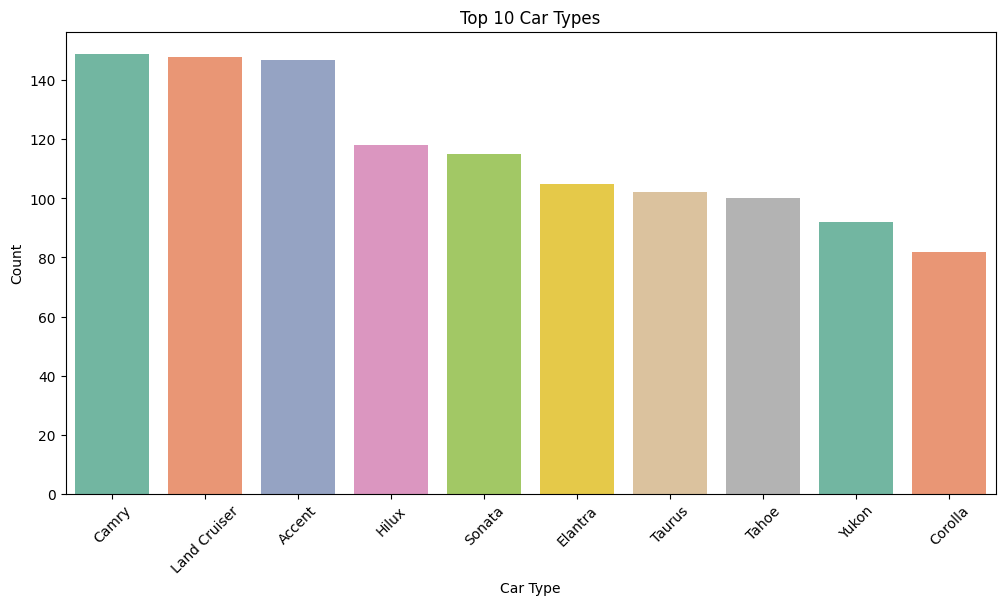

In [18]:
# tampilkan 10 mobil terbanyak berdasarkan kolom Type, dennga warnna berbeda di setiap jenis mobil
df_top_10 = df['Type'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=df_top_10.index, y=df_top_10.values, palette='Set2')
plt.title('Top 10 Car Types')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/3198099619.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top_10_make.index, y=df_top_10_make.values, palette='Set2')


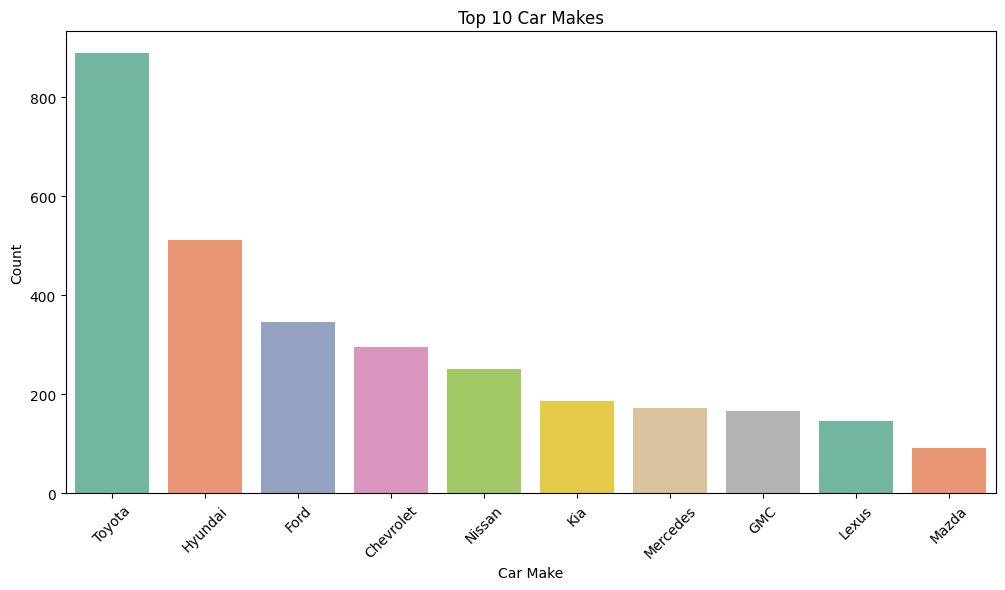

In [19]:
# tampilkan 10 mobil terbanyak berdasarkan kolom Make
df_top_10_make = df['Make'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=df_top_10_make.index, y=df_top_10_make.values, palette='Set2')
plt.title('Top 10 Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Gear_Type
Automatic    3419
Manual        404
Name: count, dtype: int64


/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/1309651714.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_most_cars_by_gear.index, y= top_10_most_cars_by_gear.values,palette='Set2')


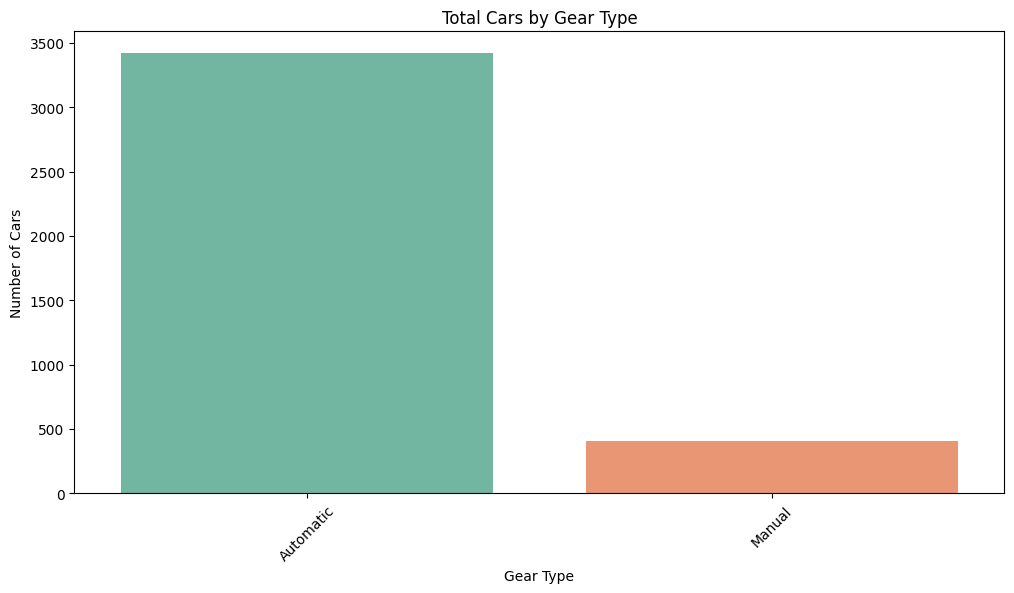

In [20]:
# tampilkan mobil terbanyak berdasarkan kolom Gear_type
top_10_most_cars_by_gear = df['Gear_Type'].value_counts()
print(top_10_most_cars_by_gear)
# buat grafik distribusi jumlah mobil berdasarkan kolom Gear_type
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_most_cars_by_gear.index, y= top_10_most_cars_by_gear.values,palette='Set2')
plt.title('Total Cars by Gear Type')
plt.xticks(rotation=45)
plt.xlabel('Gear Type')
plt.ylabel('Number of Cars')
plt.show()

Origin
Saudi          2892
Gulf Arabic     495
Other           420
Unknown          16
Name: count, dtype: int64


/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/2158017494.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_most_cars_by_origin.index, y= top_10_most_cars_by_origin.values, palette='Set2')


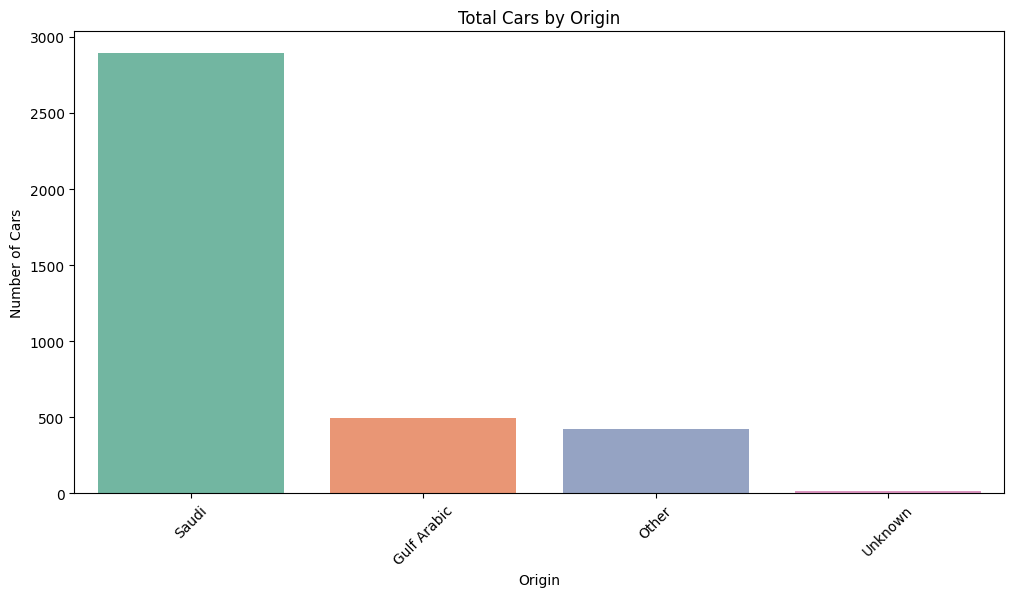

In [21]:
# tampilkan mobil terbanyak berdasarkan kolom Origin
top_10_most_cars_by_origin = df['Origin'].value_counts()
print(top_10_most_cars_by_origin)
# buat grafik distribusi jumlah mobil berdasarkan kolom Origin
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_most_cars_by_origin.index, y= top_10_most_cars_by_origin.values, palette='Set2')
plt.title('Total Cars by Origin')
plt.xticks(rotation=45)
plt.xlabel('Origin')
plt.ylabel('Number of Cars')
plt.show()

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/4109065377.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top_10_options.index, y=df_top_10_options.values, palette='Set2')


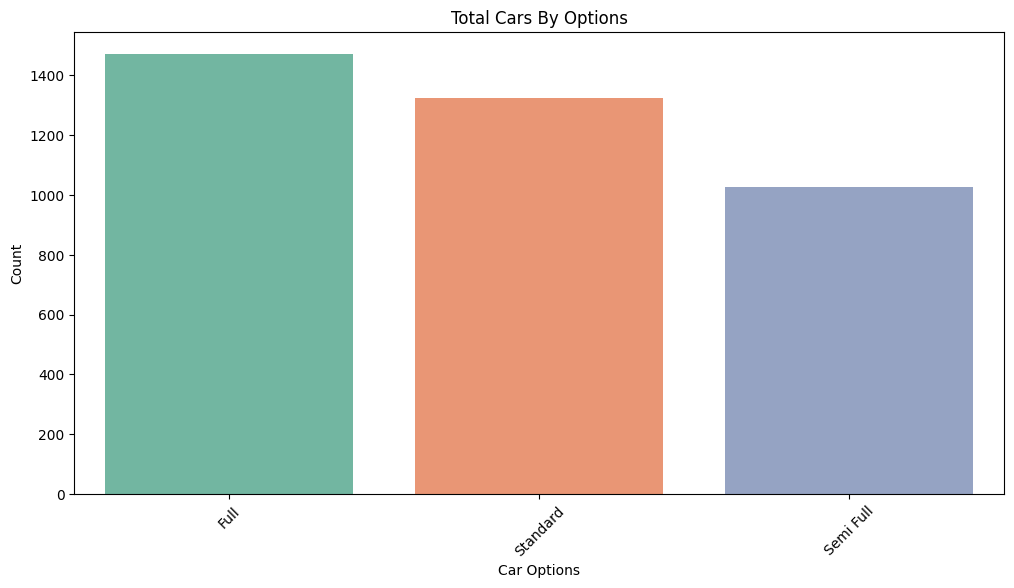

In [22]:
# tampilkan mobil terbanyak berdasarkan kolom 'Options'
df_top_10_options = df['Options'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=df_top_10_options.index, y=df_top_10_options.values, palette='Set2')
plt.title('Total Cars By Options')
plt.xlabel('Car Options')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/2289343288.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_most_cars_by_year.index, y= top_10_most_cars_by_year.values, palette='Set2')


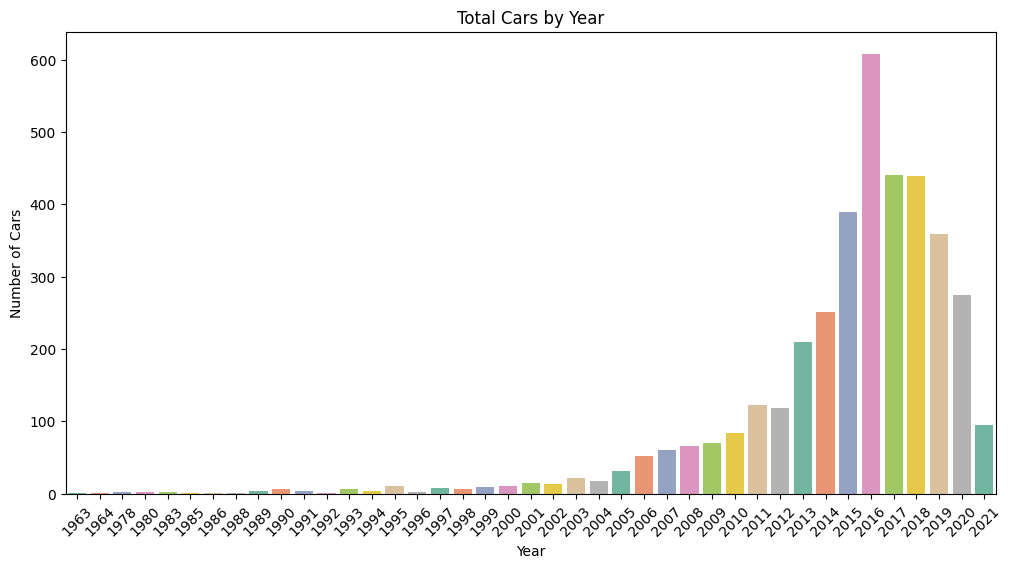

In [23]:
# tampilkan mobil terbanyak berdasarkan kolom tahun pembuatan
top_10_most_cars_by_year = df['Year'].value_counts()
# buat grafik distribusi jumlah mobil berdasarkan kolom Year
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_most_cars_by_year.index, y= top_10_most_cars_by_year.values, palette='Set2')
plt.title('Total Cars by Year')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()

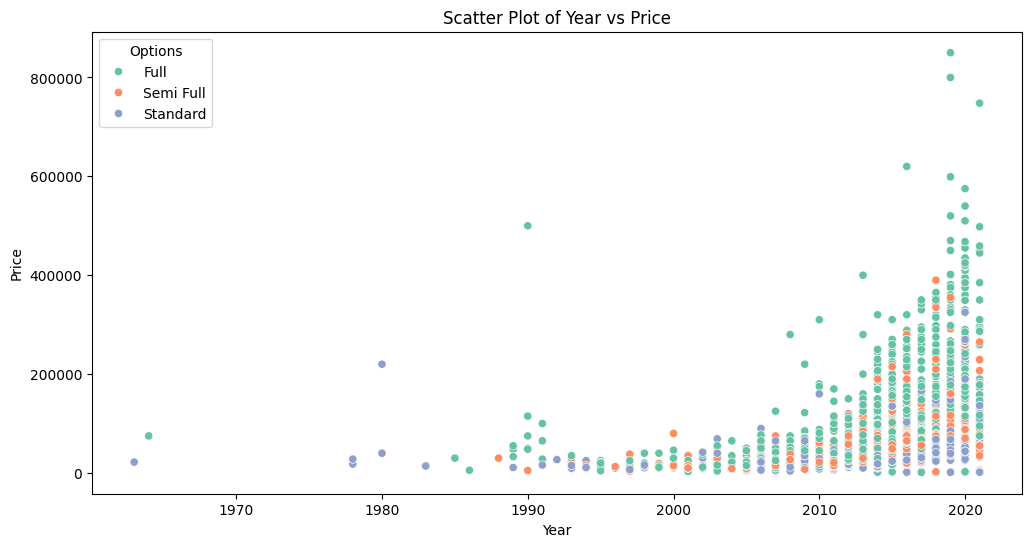

In [24]:
# tampilkan scatter plot antara kolom Year dan Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Price', data=df, hue='Options', palette='Set2')
plt.title('Scatter Plot of Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

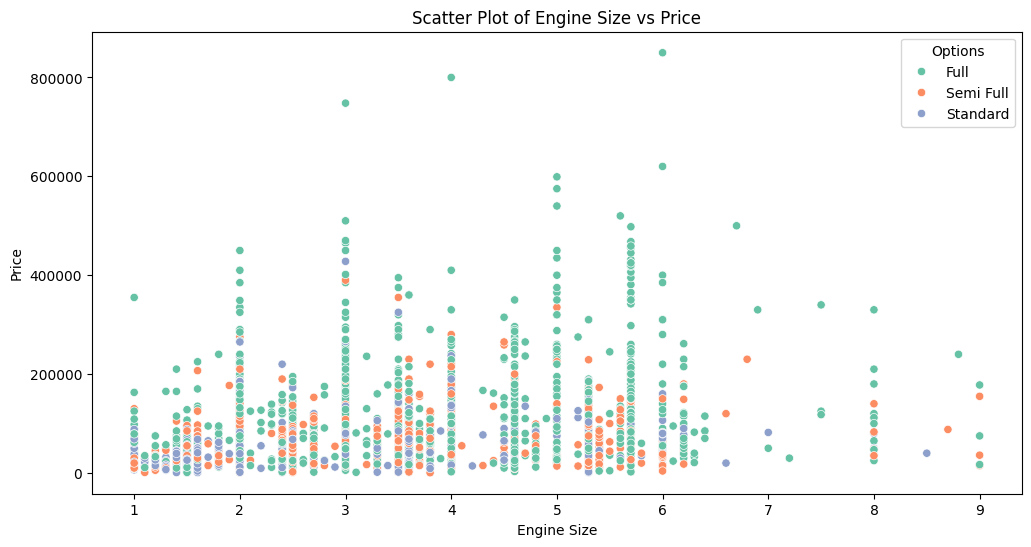

In [25]:
# tampilkan scatter plot antara kolom Engine_size dan Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Engine_Size', y='Price', data=df, hue='Options', palette='Set2')
plt.title('Scatter Plot of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

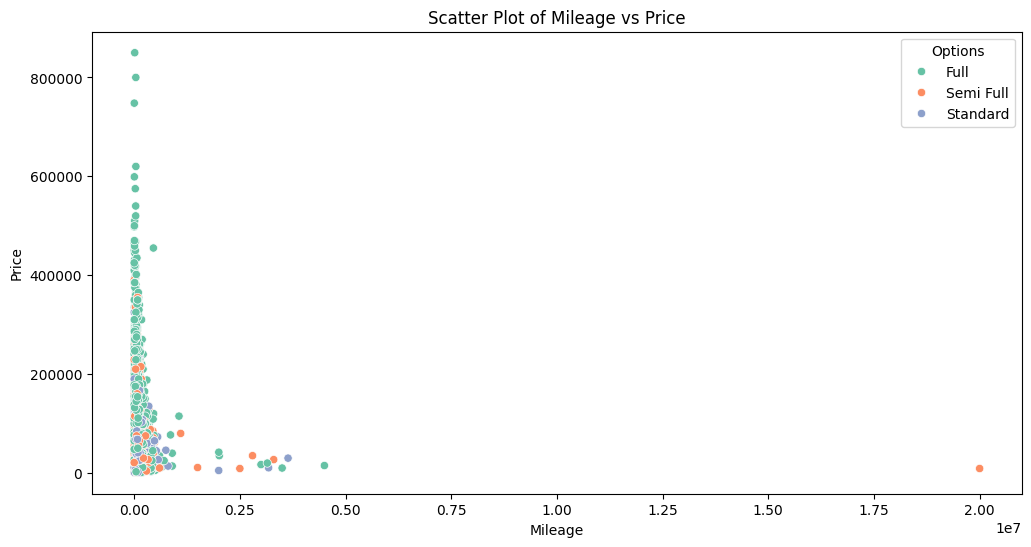

In [26]:
# tampilkan scatter plot antara kolom Mileage dan Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Mileage', y='Price', data=df, hue='Options', palette='Set2')
plt.title('Scatter Plot of Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

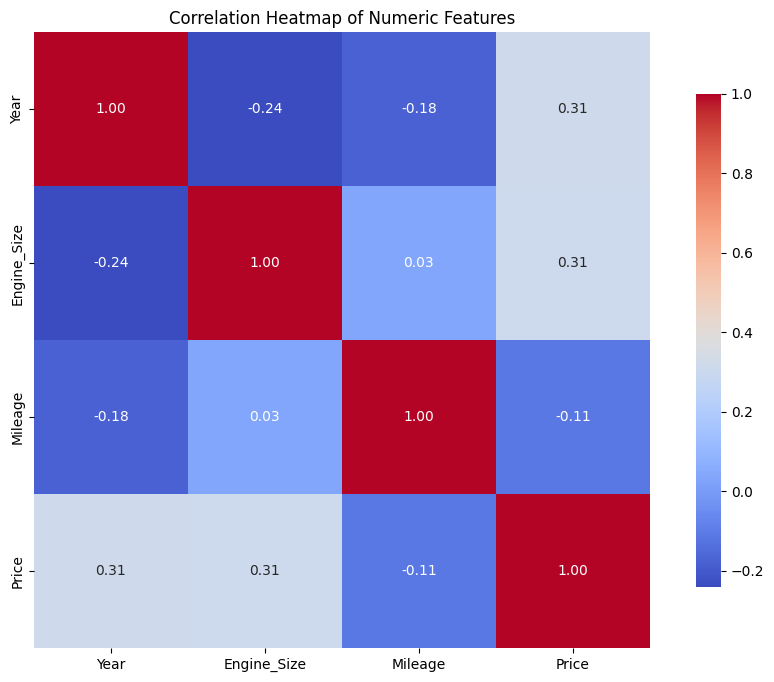

In [27]:
# tampilkan korelasi heatmap antnar kolom-kolom numerik
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

dari hasil heatmap diatas penjelasan korelasinnya :
Dari hasil heatmap di atas, kita dapat melihat beberapa korelasi yang signifikan antara fitur-fitur numerik.
1. **Price dan Year**: Terdapat korelasi positif yang kuat antara `Price` dan `Year`, yang menunjukkan bahwa mobil yang lebih baru cenderung memiliki harga yang lebih tinggi.
2. **Price dan Mileage**: Terdapat korelasi negatif yang signifikan antara `Price` dan `Mileage`, yang menunjukkan bahwa mobil dengan jarak tempuh yang lebih rendah cenderung memiliki harga yang lebih tinggi.
3. **Price dan Engine_Size**: Terdapat korelasi positif yang moderat antara `Price` dan `Engine_Size`, yang menunjukkan bahwa mobil dengan ukuran mesin yang lebih besar cenderung memiliki harga yang lebih tinggi.


/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/3344171309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Price'],color='blue', palette='Set2')


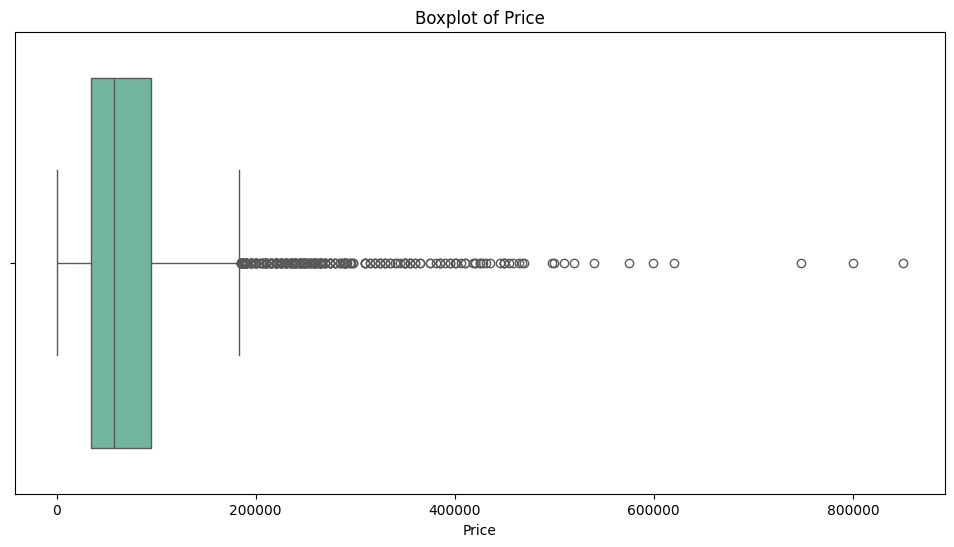

In [28]:
# tampilkan outlier pada kolom Price
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Price'],color='blue', palette='Set2')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

In [ ]:

outliers = df[(df['Price'] < (df['Price'].quantile(0.25) - 1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25)))) | 
              (df['Price'] > (df['Price'].quantile(0.75) + 1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25))))]
outliers

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
17,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,2019,4.6,71000,200000
60,SL,Jeddah,Mercedes,Automatic,Saudi,Full,2017,4.7,81000,265000
73,Land Cruiser,Qassim,Toyota,Automatic,Saudi,Full,2019,4.5,82808,230000
74,GLC,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2020,2.0,4000,225000
...,...,...,...,...,...,...,...,...,...,...
5530,The 7,Jeddah,BMW,Automatic,Saudi,Full,2019,3.0,14000,247000
5548,The M,Riyadh,BMW,Automatic,Saudi,Full,2020,6.0,13000,385000
5555,S8,Dammam,Audi,Automatic,Gulf Arabic,Full,2016,4.0,42000,229000
5573,S,Jeddah,Mercedes,Automatic,Saudi,Semi Full,2015,4.0,157000,215000


In [30]:
# tampilkan data outlier pada kolom Price diatas 200000 urutkan berdasarkan kolom Price dari yang tertinggi
outliers_price = df[df['Price'] > 200000]
print("Data Outliers on Price above 200000:")
display(outliers_price.sort_values(by='Price', ascending=False))

Data Outliers on Price above 200000:


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,850000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,800000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,748000
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,620000
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,599000
...,...,...,...,...,...,...,...,...,...,...
3846,ES,Jeddah,Lexus,Automatic,Saudi,Full,2019,3.5,26000,207000
4247,LX,Qassim,Lexus,Automatic,Gulf Arabic,Full,2014,5.7,88000,207000
3017,Land Cruiser,Jeddah,Toyota,Automatic,Gulf Arabic,Full,2019,4.0,106665,205000
3589,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Semi Full,2016,5.7,120000,205000


/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/1309055879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Mileage'], color='blue', palette='Set2')


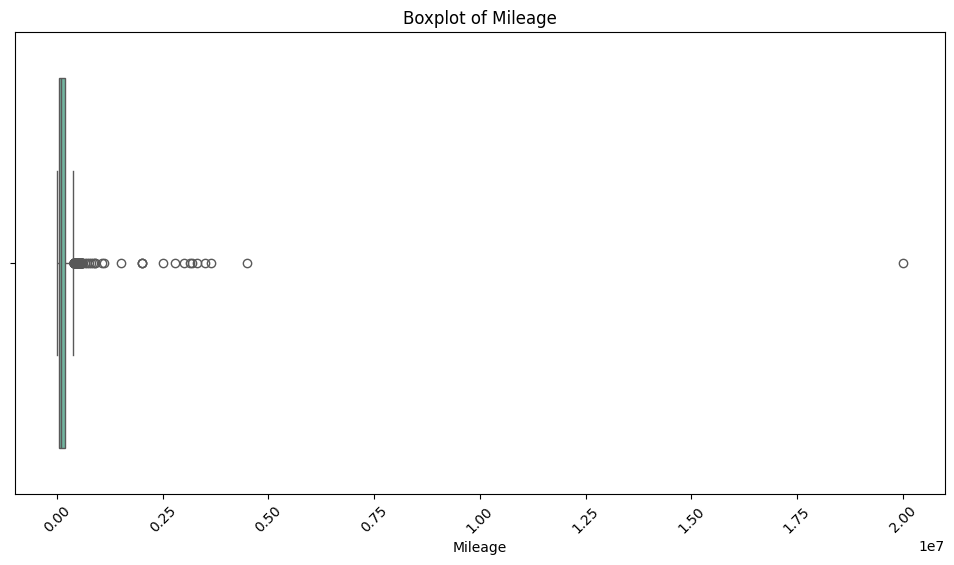

In [31]:
# tampilkan boxplot untuk kolom Mileage
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Mileage'], color='blue', palette='Set2')
plt.title('Boxplot of Mileage')
plt.xlabel('Mileage')
plt.xticks(rotation=45)
plt.show()

In [32]:
# tampilkan korelasi antara kolom-kolom numerik dan kolom Price
correlation = df_numeric.corr()
correlation

,Year,Engine_Size,Mileage,Price
Year,1.000000,-0.239786,-0.178366,0.314671
Engine_Size,-0.239786,1.000000,0.032295,0.308894
Mileage,-0.178366,0.032295,1.000000,-0.113334
Price,0.314671,0.308894,-0.113334,1.000000


In [33]:
correlation_price = df_numeric.corr()['Price']
display(correlation_price)

Year           0.314671
Engine_Size    0.308894
Mileage       -0.113334
Price          1.000000
Name: Price, dtype: float64

## 3. Data Spliting ##

In [34]:
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


In [35]:
# data spliting
X = df.drop(columns=['Price'])
y = df['Price']

In [36]:
# split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 4. Preprocessing ##

In [37]:
#preprocessing
# encoder

# buat encoder untuk OneHotEncoder dan BinaryEncoder
transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(drop='first'), ['Gear_Type', 'Options', 'Origin']),
    ('binary', BinaryEncoder(), ['Type', 'Make', 'Region'])
], remainder='passthrough')

In [38]:
# scaling features (satu persatu, tanpa Pipeline)
scaler = RobustScaler()

In [39]:
# macam-macam metrics
from sklearn import metrics

In [40]:
import xgboost

In [41]:

from sklearn.ensemble import RandomForestRegressor


In [42]:
# Define models (4 kandidat model)
lasso = Lasso(alpha=1, random_state=0)
knn = KNeighborsRegressor(n_neighbors=5)
tree = DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=1, max_depth=5, random_state=0)
ridge = Ridge(alpha=1, random_state=0)
# tambahkan model regresi linear
linear = LinearRegression()
#xgboost
xgboost_model = xgboost.XGBRegressor(objective='reg:squarederror', random_state=0)
# random forest
rf = RandomForestRegressor(n_estimators=100, random_state=0)

In [43]:
# pilihan model algoritma
models = [lasso, ridge, knn, tree, linear, xgboost_model, rf]

nilai_mean = []
nilai_std = []

# mencari model terbaik berdasarkan MAE terkecil
for i in models:

    # Pipeline berisi 3 tahap, untuk diisi di pada estimator di cross val
    estimator=Pipeline([
                        ('preprocess', transformer),
                        ('scaler', RobustScaler()),
                        ('model', i)
                    ])

    # cross val
    model_cv = cross_val_score(
        estimator = estimator, 
        X = X_train, # menggunakan X_train awal (karena transform dan scaling dilakukan di Pipeline)
        y = y_train, 
        cv = 5,
        scoring = 'neg_mean_absolute_error'
        )

    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())

    print(model_cv, i)

[-36975.53286011 -34224.90691824 -35668.50442991 -35230.51052071
 -33519.44162933] Lasso(alpha=1, random_state=0)
[-36969.89426573 -34200.12130498 -35631.88611305 -35220.09497991
 -33491.81119401] Ridge(alpha=1, random_state=0)
[-22252.02222222 -20072.90915033 -20253.99346405 -24801.99050736
 -20436.58559738] KNeighborsRegressor()
[-31398.50163399 -28137.39705882 -28705.23366013 -31487.96235679
 -29586.98690671] DecisionTreeRegressor(criterion='absolute_error', max_depth=5, random_state=0)
[-36977.16002219 -34228.01905614 -35672.95452204 -35232.71817424
 -33522.24880585] LinearRegression()
[-19773.38867188 -20380.51953125 -19345.05078125 -20454.42578125
 -19330.375     ] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None,

In [44]:
# Perbandingan performa antar model
pd.DataFrame({
    'model':['Lasso','Ridge', 'KNN Regressor', 'Decision Tree Regressor','Linear', 'XGboost', 'Random Forest'],
    'mean': nilai_mean,
    'std': nilai_std
})

,model,mean,std
0,Lasso,-35123.779272,1193.229164
1,Ridge,-35102.761572,1199.153449
2,KNN Regressor,-21563.500188,1798.248489
3,Decision Tree Regressor,-29863.216323,1370.589605
4,Linear,-35126.620116,1192.956595
5,XGboost,-19856.751953,485.264197
6,Random Forest,-20349.299104,1969.791488


## 5. Hyperparameter Tuning with GridSearch ##

5. 1 Decision Tree

In [45]:
# hyperparameter yang akan diisikan pada model (tree)
hyperparam_space = {
    'model__criterion':['absolute_error','squared_error'],                    # benchmark: absolute_error
    'model__min_samples_leaf': [1, 5, 10, 15, 20, 50],                        # benchmark: 1
    'model__max_depth':[5, 6, 7, 8, 9, 10]                                    # benchmark: 5
    # 'scaler':[StandardScaler(), MinMaxScaler(), RobustScaler()]
} 

In [46]:
# model benchmark
tree = DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=1, max_depth=5, random_state=0)

# model dalam pipeline
tree_pipeline = Pipeline([
    ('preprocess', transformer),
    ('scaler', RobustScaler()),
    ('model', tree)
])


# Grid search (mencari hyperparameter terbaik)
grid_search = GridSearchCV(
    estimator = tree_pipeline,           # model to tune
    param_grid = hyperparam_space,       # hyperparam space
    cv = 5,
    scoring = 'neg_mean_absolute_error', # metric
    n_jobs= -1
) 

In [47]:
# fit grid_search pada train set
grid_search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Options',
                                                                          'Origin']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Make',
                                                                          'Region'])])),
                                       ('scaler', RobustScaler()),
                                       ('model',
                                        DecisionTreeRegressor(criterion='absolute_error',
                                                              max_depth=5,
                                                              random_state=0))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['absolute_error',
                                              'squared_error'],
                         'model__max_depth': [5, 6, 7, 8, 9, 10],
                         'model__min_samples_leaf': [1, 5, 10, 15, 20, 50]},
             scoring='neg_mean_absolute_error')

In [48]:
# score terbaik hasil dari grid_search
print(grid_search.best_score_)

# hyperparameter pada score terbaik hasil dari grid_search
print(grid_search.best_params_)

-24231.296605265125
{'model__criterion': 'absolute_error', 'model__max_depth': 10, 'model__min_samples_leaf': 5}


In [49]:
# hasil dari 72 kombinasi hyperparameter
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,param_model__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.765060,0.031758,0.025303,0.002954,absolute_error,5,1,"{'model__criterion': 'absolute_error', 'model__max_depth': 5, 'model__min_samples_leaf': 1}",-31398.501634,-28137.397059,-28705.233660,-31487.962357,-29586.986907,-29863.216323,1370.589605,60
1,0.756718,0.033845,0.029411,0.004219,absolute_error,5,5,"{'model__criterion': 'absolute_error', 'model__max_depth': 5, 'model__min_samples_leaf': 5}",-31363.370915,-28276.285948,-28538.158497,-31437.225859,-29562.846154,-29835.577475,1348.220960,59
2,0.740347,0.028923,0.025605,0.004340,absolute_error,5,10,"{'model__criterion': 'absolute_error', 'model__max_depth': 5, 'model__min_samples_leaf': 10}",-31310.266340,-28125.959150,-28440.936275,-31320.613748,-29485.923077,-29736.739718,1365.377059,56
3,0.739118,0.030907,0.025754,0.001748,absolute_error,5,15,"{'model__criterion': 'absolute_error', 'model__max_depth': 5, 'model__min_samples_leaf': 15}",-31342.129085,-27940.910131,-27463.812092,-31342.299509,-29560.391162,-29529.908396,1634.839686,54
4,0.715801,0.033822,0.026148,0.003280,absolute_error,5,20,"{'model__criterion': 'absolute_error', 'model__max_depth': 5, 'model__min_samples_leaf': 20}",-31369.906863,-28843.279412,-27608.419935,-31632.806874,-29562.027823,-29803.288181,1523.069451,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.120064,0.002845,0.030274,0.002738,squared_error,10,5,"{'model__criterion': 'squared_error', 'model__max_depth': 10, 'model__min_samples_leaf': 5}",-29399.710462,-23740.120044,-26699.269815,-27414.930115,-27436.865146,-26938.179116,1834.108793,21
68,0.121174,0.003248,0.027671,0.003554,squared_error,10,10,"{'model__criterion': 'squared_error', 'model__max_depth': 10, 'model__min_samples_leaf': 10}",-28046.003461,-24914.064378,-25862.617120,-27730.867962,-26624.747001,-26635.659985,1161.908347,12
69,0.117038,0.003474,0.029357,0.001049,squared_error,10,15,"{'model__criterion': 'squared_error', 'model__max_depth': 10, 'model__min_samples_leaf': 15}",-28458.593706,-26026.729610,-25843.055839,-27853.683790,-26022.698334,-26840.952256,1092.765691,19
70,0.111994,0.009711,0.022412,0.002622,squared_error,10,20,"{'model__criterion': 'squared_error', 'model__max_depth': 10, 'model__min_samples_leaf': 20}",-28949.961424,-28752.311129,-27197.366464,-28667.797283,-28237.222008,-28360.931662,626.655967,41


In [50]:
# model dengan score tertinggi
pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,param_model__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,0.825245,0.032960,0.022553,0.001543,absolute_error,10,5,"{'model__criterion': 'absolute_error', 'model__max_depth': 10, 'model__min_samples_leaf': 5}",-25389.975490,-21362.968954,-24602.926471,-26258.309329,-23542.302782,-24231.296605,1690.647337,1
25,0.820748,0.027536,0.024105,0.002221,absolute_error,9,5,"{'model__criterion': 'absolute_error', 'model__max_depth': 9, 'model__min_samples_leaf': 5}",-25662.581699,-22099.978758,-24697.697712,-26267.163666,-24019.307692,-24549.345906,1448.622793,2
32,0.797128,0.033396,0.025794,0.003998,absolute_error,10,10,"{'model__criterion': 'absolute_error', 'model__max_depth': 10, 'model__min_samples_leaf': 10}",-26003.985294,-22205.207516,-24581.985294,-27517.013093,-25715.055646,-25204.649369,1768.097308,3
33,0.772910,0.031290,0.021343,0.001986,absolute_error,10,15,"{'model__criterion': 'absolute_error', 'model__max_depth': 10, 'model__min_samples_leaf': 15}",-26366.968954,-23455.534314,-24234.563725,-27917.782324,-25145.824877,-25424.134839,1579.565627,4
27,0.779676,0.033929,0.023683,0.001737,absolute_error,9,15,"{'model__criterion': 'absolute_error', 'model__max_depth': 9, 'model__min_samples_leaf': 15}",-26444.174837,-23676.531046,-24174.923203,-27899.369885,-25241.160393,-25487.231873,1535.935697,5


In [51]:
# buat dataframe menampilkan hasil MSE untuk model decision tree regressor ke dalam grafik regresi
mse_df = pd.DataFrame({
    'Model': ['Decision Tree Regressor'],
    'MSE': [mean_squared_error(y_test, grid_search.predict(X_test))]
})
# tampilkan dataframe mse_df
mse_df

,Model,MSE
0,Decision Tree Regressor,1.397328e+09


/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/2576090891.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=grid_search.predict(X_test), color='blue', palette='Set2')


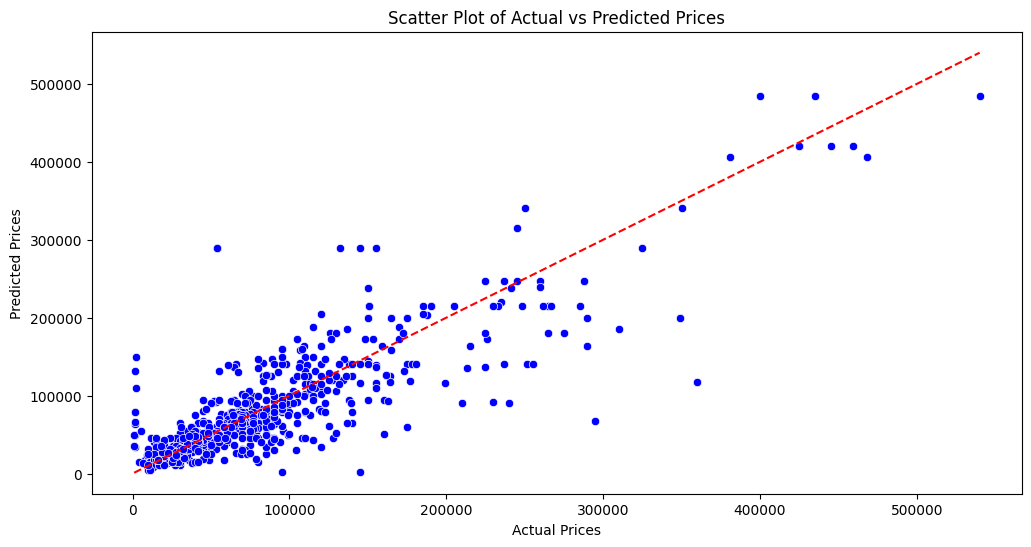

In [52]:
# buat grafik scater plot prediksi dengan line regresi
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=grid_search.predict(X_test), color='blue', palette='Set2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Scatter Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

5.2 XGBoost

In [53]:
# Hyperparameter yang digunakann untuk model xgboost
hyperparam_space_xgboost = {
    'model__n_estimators': [100, 200, 300],  # benchmark: 100
    'model__learning_rate': [0.01, 0.1, 0.2],  # benchmark: 0.01
    'model__max_depth': [3, 5, 7],  # benchmark: 3
    'model__subsample': [0.8, 0.9, 1.0],  # benchmark: 0.8
    'model__colsample_bytree': [0.8, 0.9, 1.0],  # benchmark: 0.8
    'model__reg_alpha': [0, 0.1, 1],  # benchmark: 0
    'model__reg_lambda': [0, 0.1, 1]  # benchmark: 0
}

In [55]:
#model benchmark
xgboost_model = xgboost.XGBRegressor(objective='reg:squarederror', random_state=0)
#model dalam pipeline
xgboost_pipeline = Pipeline([
    ('preprocess', transformer),
    ('scaler', RobustScaler()),
    ('model', xgboost_model)
])

# Grid search (mencari hyperparameter terbaik)
grid_search_xgboost = GridSearchCV(
    estimator = xgboost_pipeline,           # model to tune
    param_grid = hyperparam_space_xgboost,  # hyperparam space
    cv = 5,
    scoring = 'neg_mean_absolute_error',     # metric
    n_jobs= -1
)


In [56]:
grid_search_xgboost.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Options',
                                                                          'Origin']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Make',
                                                                          'Region'])])),
                                       ('scaler', RobustScaler()),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylev...
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.8, 0.9, 1.0],
                         'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200, 300],
                         'model__reg_alpha': [0, 0.1, 1],
                         'model__reg_lambda': [0, 0.1, 1],
                         'model__subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_absolute_error')

In [57]:
grid_search_xgboost.best_score_

np.float64(-18386.857421875)

In [58]:
grid_search_xgboost.best_params_

{'model__colsample_bytree': 0.9,
 'model__learning_rate': 0.1,
 'model__max_depth': 7,
 'model__n_estimators': 200,
 'model__reg_alpha': 0.1,
 'model__reg_lambda': 1,
 'model__subsample': 0.8}

In [59]:
pd.DataFrame(grid_search_xgboost.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__colsample_bytree,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__reg_alpha,param_model__reg_lambda,param_model__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.213751,0.007365,0.036792,0.002760,0.8,0.01,3,100,0.0,0.0,0.8,"{'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__reg_alpha': 0, 'model__reg_lambda': 0, 'model__subsample': 0.8}",-35835.386719,-34971.406250,-34181.679688,-34050.039062,-32815.578125,-34370.817969,1006.291337,2167
1,0.223500,0.007412,0.035427,0.004979,0.8,0.01,3,100,0.0,0.0,0.9,"{'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__reg_alpha': 0, 'model__reg_lambda': 0, 'model__subsample': 0.9}",-35879.980469,-35096.980469,-34229.132812,-33988.679688,-32935.207031,-34425.996094,1001.672942,2176
2,0.222178,0.008453,0.034604,0.003101,0.8,0.01,3,100,0.0,0.0,1.0,"{'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__reg_alpha': 0, 'model__reg_lambda': 0, 'model__subsample': 1.0}",-36093.226562,-35306.312500,-34105.503906,-34020.031250,-32913.585938,-34487.732031,1103.672502,2183
3,0.209052,0.003073,0.032733,0.001507,0.8,0.01,3,100,0.0,0.1,0.8,"{'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__reg_alpha': 0, 'model__reg_lambda': 0.1, 'model__subsample': 0.8}",-35836.738281,-34943.246094,-34188.796875,-34051.839844,-32806.089844,-34365.342187,1005.952208,2164
4,0.211224,0.005641,0.036130,0.002458,0.8,0.01,3,100,0.0,0.1,0.9,"{'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__reg_alpha': 0, 'model__reg_lambda': 0.1, 'model__subsample': 0.9}",-35882.671875,-35107.750000,-34206.980469,-33991.253906,-32916.210938,-34420.973437,1010.246150,2173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,0.975458,0.006261,0.039932,0.003243,1.0,0.20,7,300,1.0,0.1,0.9,"{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__reg_alpha': 1, 'model__reg_lambda': 0.1, 'model__subsample': 0.9}",-21242.695312,-18434.761719,-19376.105469,-20601.103516,-18962.638672,-19723.460938,1042.936393,576
2183,0.915932,0.002895,0.041173,0.003109,1.0,0.20,7,300,1.0,0.1,1.0,"{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__reg_alpha': 1, 'model__reg_lambda': 0.1, 'model__subsample': 1.0}",-20775.912109,-18392.433594,-19942.382812,-22291.414062,-19295.146484,-20139.457813,1329.645334,807
2184,0.981065,0.011132,0.040376,0.003033,1.0,0.20,7,300,1.0,1.0,0.8,"{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__reg_alpha': 1, 'model__reg_lambda': 1, 'model__subsample': 0.8}",-19906.134766,-18265.394531,-19875.654297,-20189.480469,-19235.712891,-19494.475391,689.259117,435
2185,0.941132,0.048987,0.033407,0.006424,1.0,0.20,7,300,1.0,1.0,0.9,"{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__reg_alpha': 1, 'model__reg_lambda': 1, 'model__subsample': 0.9}",-20674.335938,-19214.574219,-19536.369141,-20436.587891,-19141.976562,-19800.768750,634.810828,606


In [60]:
# model dengan score tertinggi
pd.DataFrame(grid_search_xgboost.cv_results_).sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__colsample_bytree,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__reg_alpha,param_model__reg_lambda,param_model__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1176,0.928022,0.035688,0.059551,0.007333,0.9,0.1,7,200,0.1,1.0,0.8,"{'model__colsample_bytree': 0.9, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__reg_alpha': 0.1, 'model__reg_lambda': 1, 'model__subsample': 0.8}",-19606.562500,-17090.107422,-18290.074219,-19398.822266,-17548.720703,-18386.857422,990.469993,1
1167,0.748584,0.006257,0.041885,0.004273,0.9,0.1,7,200,0.0,1.0,0.8,"{'model__colsample_bytree': 0.9, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__reg_alpha': 0, 'model__reg_lambda': 1, 'model__subsample': 0.8}",-19606.562500,-17090.107422,-18290.074219,-19398.822266,-17548.722656,-18386.857812,990.469662,2
1203,1.131967,0.013206,0.052547,0.009921,0.9,0.1,7,300,0.1,1.0,0.8,"{'model__colsample_bytree': 0.9, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__reg_alpha': 0.1, 'model__reg_lambda': 1, 'model__subsample': 0.8}",-19633.574219,-17114.865234,-18260.910156,-19466.318359,-17653.761719,-18425.885937,988.248826,3
1194,1.239732,0.013602,0.063110,0.015165,0.9,0.1,7,300,0.0,1.0,0.8,"{'model__colsample_bytree': 0.9, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__reg_alpha': 0, 'model__reg_lambda': 1, 'model__subsample': 0.8}",-19633.574219,-17114.867188,-18300.322266,-19466.318359,-17653.761719,-18433.768750,987.057458,4
1185,0.870941,0.011541,0.045743,0.008357,0.9,0.1,7,200,1.0,1.0,0.8,"{'model__colsample_bytree': 0.9, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__reg_alpha': 1, 'model__reg_lambda': 1, 'model__subsample': 0.8}",-19681.849609,-17237.634766,-18290.066406,-19401.929688,-17578.509766,-18437.998047,967.244209,5


/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/453568452.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=grid_search_xgboost.predict(X_test), color='blue', palette='Set2')


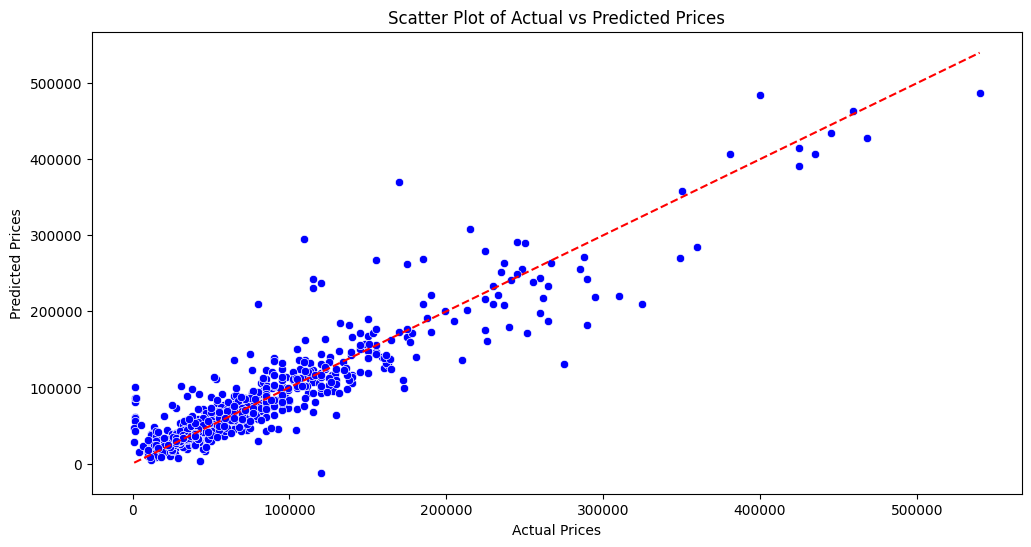

In [61]:
# buat grafik scater plot prediksi dengan line regresi
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=grid_search_xgboost.predict(X_test), color='blue', palette='Set2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Scatter Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

5.3 Random Forest

In [62]:
# Hyperparameter yang digunakann untuk model  Random Forest
hyperparam_space_rf = {
    'model__n_estimators': [100, 200, 300],  # benchmark: 100
    'model__max_depth': [5, 6, 7, 8, 9, 10],  # benchmark: 5
    'model__min_samples_leaf': [1, 5, 10, 15, 20, 50],  # benchmark: 1
    'model__max_features': ['auto', 'sqrt', 'log2']  # benchmark: 'auto'
}

In [63]:
# model benchmark
rf = RandomForestRegressor(n_estimators=100, random_state=0)
# model dalam pipeline
rf_pipeline = Pipeline([
    ('preprocess', transformer),
    ('scaler', RobustScaler()),
    ('model', rf)
])
# Grid search (mencari hyperparameter terbaik)
grid_search_rf = GridSearchCV(
    estimator = rf_pipeline,           # model to tune
    param_grid = hyperparam_space_rf,  # hyperparam space
    cv = 5,
    scoring = 'neg_mean_absolute_error', # metric
    n_jobs= -1
)

In [64]:
# fit grid_search pada train set
grid_search_rf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
499 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  Fi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Options',
                                                                          'Origin']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Make',
                                                                          'Region'])])),
                                       ('scaler', RobustScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, 6, 7, 8, 9, 10],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 5, 10, 15, 20, 50],
                         'model__n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error')

In [65]:
grid_search_rf.best_score_

np.float64(-21952.792734541832)

In [66]:
grid_search_rf.best_params_

{'model__max_depth': 10,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 1,
 'model__n_estimators': 300}

In [67]:
pd.DataFrame(grid_search_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.122466,0.002811,0.000000,0.000000,5,auto,1,100,"{'model__max_depth': 5, 'model__max_features': 'auto', 'model__min_samples_leaf': 1, 'model__n_estimators': 100}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,217
1,0.117207,0.004649,0.000000,0.000000,5,auto,1,200,"{'model__max_depth': 5, 'model__max_features': 'auto', 'model__min_samples_leaf': 1, 'model__n_estimators': 200}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,217
2,0.122408,0.029303,0.000000,0.000000,5,auto,1,300,"{'model__max_depth': 5, 'model__max_features': 'auto', 'model__min_samples_leaf': 1, 'model__n_estimators': 300}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,217
3,0.152537,0.021184,0.000000,0.000000,5,auto,5,100,"{'model__max_depth': 5, 'model__max_features': 'auto', 'model__min_samples_leaf': 5, 'model__n_estimators': 100}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,217
4,0.183649,0.006822,0.000000,0.000000,5,auto,5,200,"{'model__max_depth': 5, 'model__max_features': 'auto', 'model__min_samples_leaf': 5, 'model__n_estimators': 200}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1.004805,0.007074,0.087523,0.001807,10,log2,20,200,"{'model__max_depth': 10, 'model__max_features': 'log2', 'model__min_samples_leaf': 20, 'model__n_estimators': 200}",-30985.631989,-30847.094214,-30145.810114,-30313.787854,-28369.879883,-30132.440811,935.772535,120
320,1.439323,0.012889,0.113545,0.010084,10,log2,20,300,"{'model__max_depth': 10, 'model__max_features': 'log2', 'model__min_samples_leaf': 20, 'model__n_estimators': 300}",-30983.217448,-30927.218442,-30219.979129,-30233.885339,-28476.063323,-30168.072736,906.717655,123
321,0.510408,0.006159,0.053301,0.003247,10,log2,50,100,"{'model__max_depth': 10, 'model__max_features': 'log2', 'model__min_samples_leaf': 50, 'model__n_estimators': 100}",-35162.703311,-35195.841194,-33944.187029,-33670.621176,-32583.346501,-34111.339842,983.711846,201
322,0.876855,0.026688,0.070036,0.012686,10,log2,50,200,"{'model__max_depth': 10, 'model__max_features': 'log2', 'model__min_samples_leaf': 50, 'model__n_estimators': 200}",-35104.870784,-35161.306337,-34149.756129,-33815.535736,-32441.997997,-34134.693397,996.241387,204


In [68]:
# model dengan score tertinggi
pd.DataFrame(grid_search_rf.cv_results_).sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
290,2.180364,0.010130,0.138270,0.003936,10,sqrt,1,300,"{'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 300}",-23095.281721,-21944.352786,-21168.111281,-22911.827488,-20644.390396,-21952.792735,954.226560,1
289,1.476518,0.009980,0.102283,0.002289,10,sqrt,1,200,"{'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 200}",-23083.046556,-22097.840835,-21198.565624,-22951.093776,-20584.647562,-21983.038871,972.751070,2
288,0.794973,0.006531,0.064042,0.002724,10,sqrt,1,100,"{'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 100}",-23097.103147,-21925.792280,-21459.721342,-23090.936940,-20512.237714,-22017.158285,990.267754,3
308,2.008322,0.012788,0.134592,0.003713,10,log2,1,300,"{'model__max_depth': 10, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__n_estimators': 300}",-24184.794534,-23026.296009,-22289.957873,-23908.661342,-21570.636681,-22996.069288,977.471951,4
307,1.376502,0.009817,0.099683,0.003245,10,log2,1,200,"{'model__max_depth': 10, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__n_estimators': 200}",-24075.704720,-23290.734646,-22349.483355,-24009.472729,-21429.001304,-23030.879351,1014.607668,5


/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/3066884757.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=grid_search_rf.predict(X_test), color='blue', palette='Set2')


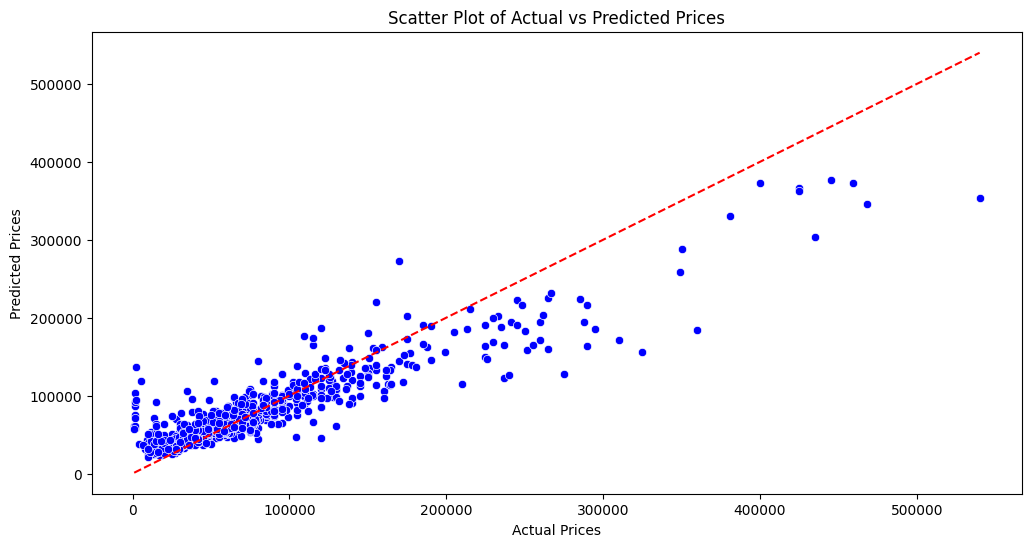

In [69]:
# buat grafik scater plot prediksi dengan line regresi
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=grid_search_rf.predict(X_test), color='blue', palette='Set2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Scatter Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [70]:
# buat perbandingan performa antar model
pd.DataFrame({
    'model':['Decision Tree', 'XGBoost', 'Random Forest'],
    'mean': [grid_search.best_score_, grid_search_xgboost.best_score_, grid_search_rf.best_score_],
    'std': [grid_search.cv_results_['std_test_score'][grid_search.best_index_],
            grid_search_xgboost.cv_results_['std_test_score'][grid_search_xgboost.best_index_],
            grid_search_rf.cv_results_['std_test_score'][grid_search_rf.best_index_]]
})

,model,mean,std
0,Decision Tree,-24231.296605,1690.647337
1,XGBoost,-18386.857422,990.469993
2,Random Forest,-21952.792735,954.226560


<b>Kesimpulan</b>

Model XGBoost Regressor adalah yang paling baik di antara ketiganya karena memiliki nilai MSE terkecil (dalam bentuk negatif). Ini berarti model tersebut:

1. Lebih akurat dalam memprediksi harga mobil bekas
2. Lebih stabil dan tahan terhadap overfitting dibanding Decision Tree
3. Lebih efisien dibanding Random Forest dalam kasus ini

## 6. Model Performance in Test Set ##

6.1 Desicion Tree

In [71]:
# model benchmark
tree = DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=1, max_depth=5, random_state=0)

# model benchmark
tree_pipeline = Pipeline([
    ('preprocess', transformer),
    ('scaler', RobustScaler()),
    ('model', tree)
])

# fitting
tree_pipeline.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Options',
                                                   'Origin']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Type', 'Make',
                                                   'Region'])])),
                ('scaler', RobustScaler()),
                ('model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                                       random_state=0))])

In [72]:
# predict
y_pred = tree_pipeline.predict(X_test)

In [73]:
# Metric evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

MSE: 2486349496.6601305
RMSE: 49863.30811990045
MAE: 29198.186928104577


/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/3968071287.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=tree_pipeline.predict(X_test), color='blue', palette='Set2')


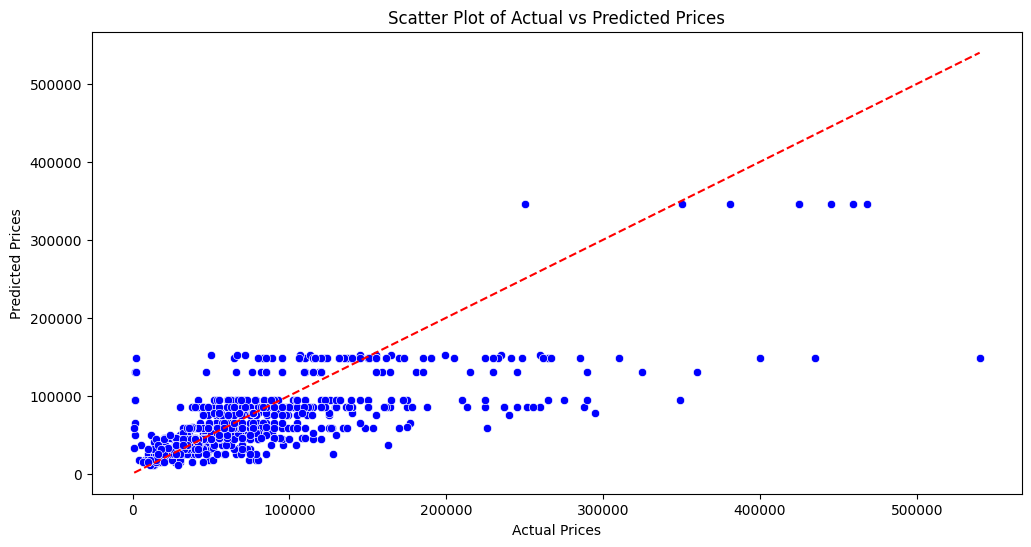

In [74]:
# buat grafik scater plot prediksi dengan line regresi
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=tree_pipeline.predict(X_test), color='blue', palette='Set2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Scatter Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

6.2 Xgboost

In [75]:
#model benchmark
xgboost_model = xgboost.XGBRegressor(objective='reg:squarederror', random_state=0)
#model dalam pipeline
xgboost_pipeline = Pipeline([
    ('preprocess', transformer),
    ('scaler', RobustScaler()),
    ('model', xgboost_model)
])
# fitting
xgboost_pipeline.fit(X_train, y_train)  
# predict
y_pred_xgboost = xgboost_pipeline.predict(X_test)
# Metric evaluation
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
rmse_xgboost = np.sqrt(mse_xgboost)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
print('MSE XGBoost:', mse_xgboost)
print('RMSE XGBoost:', rmse_xgboost)
print('MAE XGBoost:', mae_xgboost)

MSE XGBoost: 962706176.0
RMSE XGBoost: 31027.506764160087
MAE XGBoost: 17828.591796875


/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/3334681505.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=xgboost_pipeline.predict(X_test), color='blue', palette='Set2')


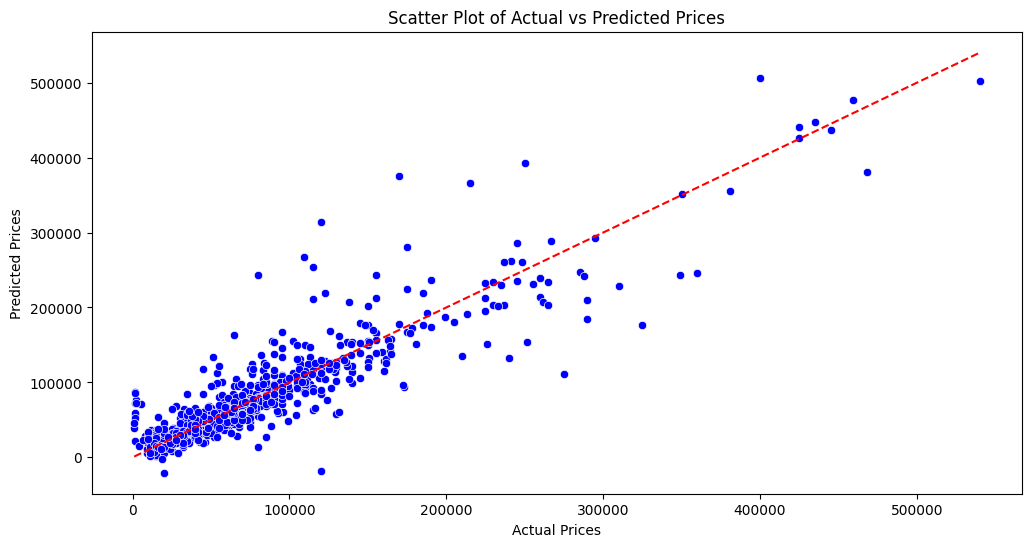

In [76]:
# buat grafik scater plot prediksi dengan line regresi
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=xgboost_pipeline.predict(X_test), color='blue', palette='Set2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Scatter Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [77]:
# tampilkan perbandingan score antara model Decision Tree dan XGBoost
pd.DataFrame({
    'model':['Decision Tree', 'XGBoost'],
    'MSE': [mse, mse_xgboost],
    'RMSE': [rmse, rmse_xgboost],
    'MAE': [mae, mae_xgboost]
})

,model,MSE,RMSE,MAE
0,Decision Tree,2.486349e+09,49863.308120,29198.186928
1,XGBoost,9.627062e+08,31027.506764,17828.591797


<b>Kesimpulan</b>

1. Mean Squared Error (MSE) : XGBoost lebih baik karena MSE-nya jauh lebih kecil (lebih dari 2x lebih baik).
2. Root Mean Squared Error (RMSE) : XGBoost lebih akurat, dengan kesalahan rata-rata sekitar 30ribu dibanding 45ribu.
3. Mean Absolute Error (MAE) : Model XGBoost Regressor adalah yang terbaik untuk prediksi harga mobil bekas

## 7. Model Performance in Test Set with best hyperparameter ##

7.1 Decision Tree

In [78]:
grid_search.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Options',
                                                   'Origin']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Type', 'Make',
                                                   'Region'])])),
                ('scaler', RobustScaler()),
                ('model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                                       min_samples_leaf=5, random_state=0))])

In [79]:
# Model setelah hyperparameter tuning
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Options',
                                                   'Origin']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Type', 'Make',
                                                   'Region'])])),
                ('scaler', RobustScaler()),
                ('model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                                       min_samples_leaf=5, random_state=0))])

In [80]:
# predict
y_pred_best = best_model.predict(X_test)

In [81]:
# Score pada test set
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print('MSE:', mse_best)
print('RMSE:', rmse_best)
print('MAE:', mae_best)

MSE: 1397327778.143791
RMSE: 37380.8477451193
MAE: 21856.428758169935


/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/1033886420.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=best_model.predict(X_test), color='blue', palette='Set2')


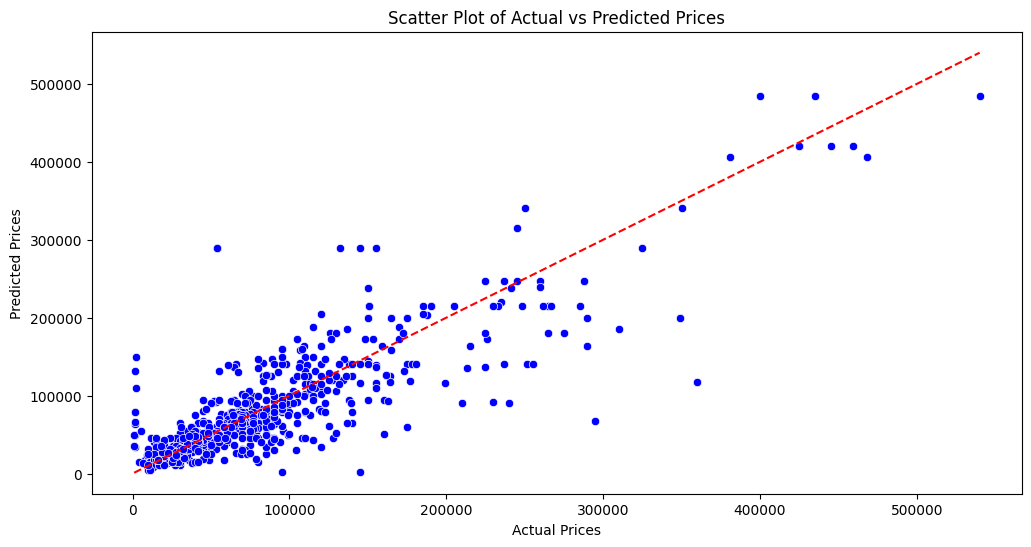

In [82]:
# buat grafik scater plot prediksi dengan line regresi
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=best_model.predict(X_test), color='blue', palette='Set2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Scatter Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

7.2 Xgboost

In [83]:
grid_search_xgboost.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Options',
                                                   'Origin']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Type', 'Make',
                                                   'Region'])])),
                ('scaler', RobustScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [84]:
# model setelah hyperparameter tuning
best_model_xgboost = grid_search_xgboost.best_estimator_


In [85]:
best_model_xgboost.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Options',
                                                   'Origin']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Type', 'Make',
                                                   'Region'])])),
                ('scaler', RobustScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [86]:
#predict
y_pred_best_xgboost = best_model_xgboost.predict(X_test)

In [87]:
#Score pada test set
mse_best_xgboost = mean_squared_error(y_test, y_pred_best_xgboost)
rmse_best_xgboost = np.sqrt(mse_best_xgboost)
mae_best_xgboost = mean_absolute_error(y_test, y_pred_best_xgboost)
print('MSE XGBoost:', mse_best_xgboost)
print('RMSE XGBoost:', rmse_best_xgboost)
print('MAE XGBoost:', mae_best_xgboost)

MSE XGBoost: 755677056.0
RMSE XGBoost: 27489.580862574097
MAE XGBoost: 16061.2626953125


/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/2866917668.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=best_model_xgboost.predict(X_test), color='blue', palette='Set2')


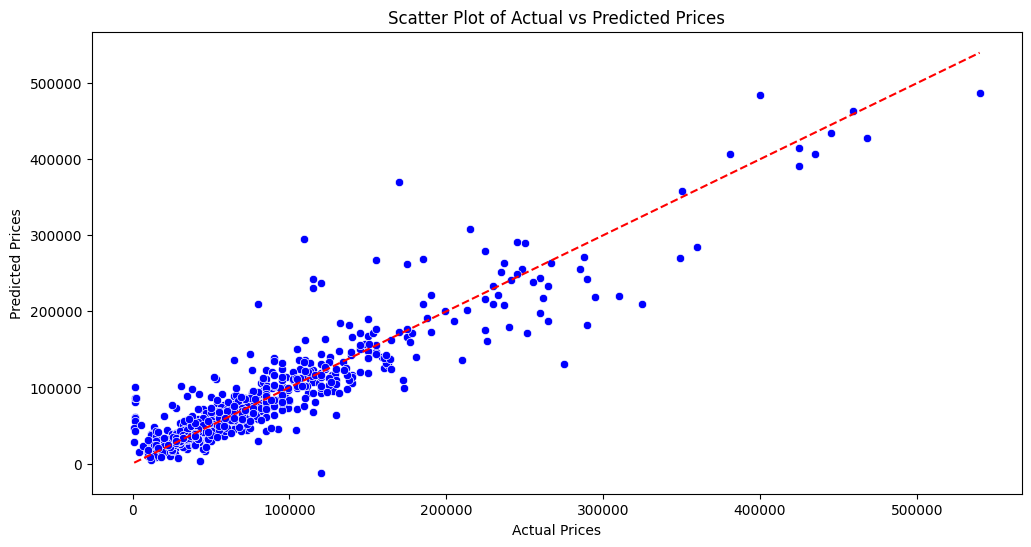

In [88]:
# buat grafik scater plot prediksi dengan line regresi
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=best_model_xgboost.predict(X_test), color='blue', palette='Set2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Scatter Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

<b>Penjelasan</b>

perbandigan grafik antara model Decision Tree dan XGBoost, penjelasannya :

1. grafik diatas menunjukkan perbandingan antara model Decision Tree dan XGBoost dalam memprediksi harga mobil bekas.
Dari grafik tersebut, terlihat bahwa model XGBoost memiliki prediksi yang lebih mendekati garis regresi (garis merah) dibandingkan dengan model Decision Tree.
2. Hal ini menunjukkan bahwa model XGBoost lebih akurat dalam memprediksi harga mobil bekas dibandingkan dengan model Decision Tree.
3. Selain itu, model XGBoost juga memiliki nilai MSE, RMSE, dan MAE yang lebih rendah dibandingkan dengan model Decision Tree, 
yang menunjukkan bahwa model XGBoost lebih baik dalam memprediksi harga mobil bekas.

Dengan demikian, model XGBoost dapat dianggap sebagai model yang lebih baik dalam memprediksi harga mobil bekas dibandingkan dengan model Decision Tree.
Oleh karena itu, model XGBoost dapat digunakan untuk memprediksi harga mobil bekas dengan lebih akurat dan dapat diandalkan.

In [89]:
# tampilkan perbandingan score antara model Decision Tree dan XGBoost setelah hyperparameter tuning
pd.DataFrame({
    'model':['Decision Tree', 'XGBoost'],
    'MSE': [mse_best, mse_best_xgboost],
    'RMSE': [rmse_best, rmse_best_xgboost],
    'MAE': [mae_best, mae_best_xgboost]
})

,model,MSE,RMSE,MAE
0,Decision Tree,1.397328e+09,37380.847745,21856.428758
1,XGBoost,7.556771e+08,27489.580863,16061.262695


<b>Kesimpulan</b>

Model XGBoost Regressor tetap menjadi yang terbaik, bahkan setelah hyperparameter tuning, karena:

1. MSE-nya lebih kecil → prediksi lebih akurat secara keseluruhan.
2. RMSE-nya lebih rendah → kesalahan prediksi rata-rata lebih kecil.
3. MAE-nya lebih rendah → prediksi lebih konsisten dan tahan terhadap outlier.

## 8. Comparison of before and after tuning model ##

8.1 Decision Tree

In [91]:
pd.DataFrame({
    'Metrics->':['Before tuning', 'After tuning'],
    'RMSE':[rmse,rmse_best], 
    'MAE':[mae, mae_best]
})

,Metrics->,RMSE,MAE
0,Before tuning,49863.308120,29198.186928
1,After tuning,37380.847745,21856.428758


In [92]:
grid_search.best_params_

{'model__criterion': 'absolute_error',
 'model__max_depth': 10,
 'model__min_samples_leaf': 5}

8.2 XgBoost

In [93]:
# rmse dan mae xgboost
pd.DataFrame({
    'Metrics->':['Before tuning', 'After tuning'],
    'RMSE':[rmse_xgboost, rmse_best_xgboost],
    'MAE':[mae_xgboost, mae_best_xgboost]
})

,Metrics->,RMSE,MAE
0,Before tuning,31027.506764,17828.591797
1,After tuning,27489.580863,16061.262695


<b> Penjelasan </b>

kesimpulannya setelah melakukan hyperparameter tuning XGBoost, setlah tuning dan sebelum tuning, didapatkan nilai RMSE dan MAE yang lebih baik setelah tuning,
sehingga model XGBoost setelah tuning lebih baik dibandingkan sebelum tuning. 

In [94]:
# best parameters
grid_search_xgboost.best_params_

{'model__colsample_bytree': 0.9,
 'model__learning_rate': 0.1,
 'model__max_depth': 7,
 'model__n_estimators': 200,
 'model__reg_alpha': 0.1,
 'model__reg_lambda': 1,
 'model__subsample': 0.8}

## 9. Solusi ##

9.1 Decision Tree

In [95]:
from sklearn.tree import plot_tree

In [96]:
tree_pipeline['model']

DecisionTreeRegressor(criterion='absolute_error', max_depth=5, random_state=0)

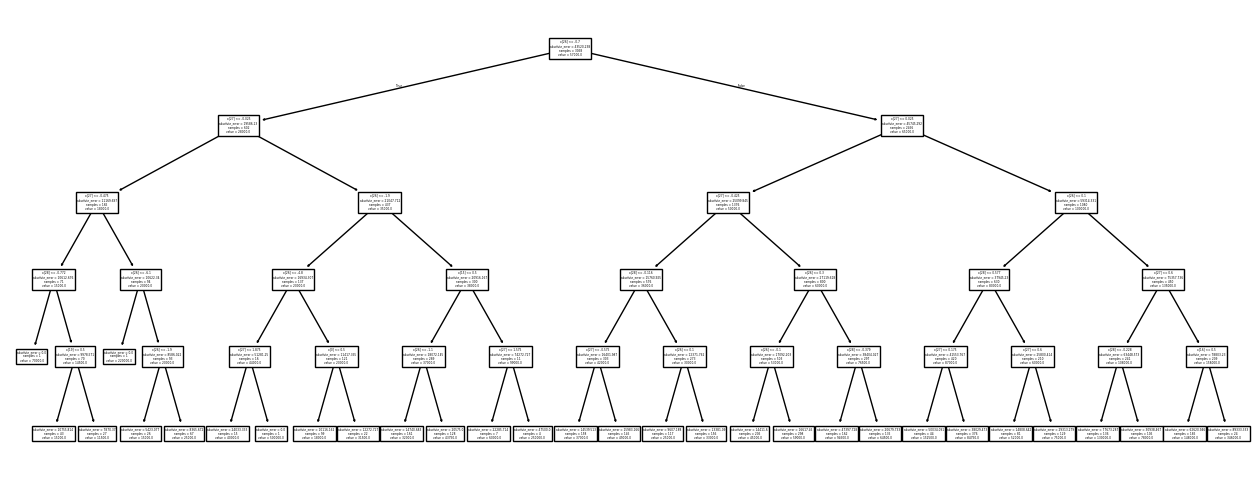

In [97]:
plt.figure(figsize=(16,6))
plot_tree(decision_tree=tree_pipeline['model'], max_depth=5);

9.2 XGBoost

In [98]:
#plot tree xgboost
best_model_xgboost['model']

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [99]:
import graphviz

In [100]:

from xgboost import plot_tree
import matplotlib.pyplot as plt



In [101]:
booster = best_model_xgboost['model'].get_booster()
booster


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


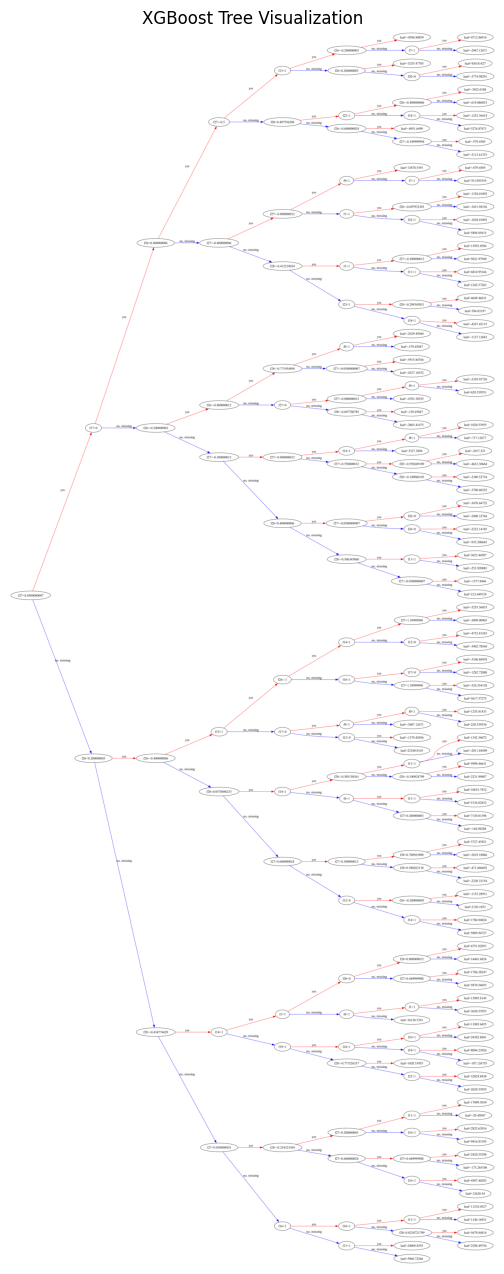

In [102]:
fig, ax = plt.subplots(figsize=(20, 16))
xgb.plot_tree(booster, num_trees=0, rankdir='LR', ax=ax)
plt.title('XGBoost Tree Visualization')
plt.show()

## 10. Hyperparameter Tuning with RandomizedSearch ##

10.1 Decision Tree

In [103]:
# hyperparameter untuk param_distributions
hyperparam_space = {
    'algo__criterion':['absolute_error', 'squared_error'],
    'algo__max_depth': range(1,101),
    'algo__min_samples_leaf': range(1,101)
}

# buat pipeline untuk dimasukkan dalam estimator RandomizedSearchCV
pipe_model = Pipeline([
    ('transformer', transformer),
    ('scaler', scaler),
    ('algo', tree)
])

random_search = RandomizedSearchCV(
    estimator= pipe_model,                      # model
    param_distributions= hyperparam_space,      # hyperparameter yg dituning
    cv= 5,                                      # jumlah fold untuk cross validation
    scoring= 'neg_mean_absolute_error',         # metric
    n_jobs= -1,                                 # pakai semua processor
    n_iter= 1000,                                 # jumlah kombinasi yang difitting
    random_state=0
)

# fit RandomizedSearchCV ke train set
random_search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Options',
                                                                                'Origin']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Make',
                                                                                'Region'])])),
                                             ('scaler', RobustScaler()),
                                             ('algo',
                                              DecisionTreeRegressor(criterion='absolute_error',
                                                                    max_depth=5,
                                                                    random_state=0))]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'algo__criterion': ['absolute_error',
                                                            'squared_error'],
                                        'algo__max_depth': range(1, 101),
                                        'algo__min_samples_leaf': range(1, 101)},
                   random_state=0, scoring='neg_mean_absolute_error')

In [104]:
# hyperparameter terbaik
random_search.best_params_

{'algo__min_samples_leaf': 5,
 'algo__max_depth': 45,
 'algo__criterion': 'absolute_error'}

In [105]:
# score MAE pada hyperparameter terbaik
random_search.best_score_

np.float64(-23798.56533861772)

In [106]:
# hasil setiap kombinasi hyperparameter
pd.DataFrame(random_search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__min_samples_leaf,param_algo__max_depth,param_algo__criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
142,0.850879,0.034441,0.023820,0.000950,5,45,absolute_error,"{'algo__min_samples_leaf': 5, 'algo__max_depth': 45, 'algo__criterion': 'absolute_error'}",-25120.702614,-20952.029412,-24037.158497,-25902.008183,-22980.927987,-23798.565339,1732.093710,1
604,0.843048,0.033984,0.025966,0.002566,5,64,absolute_error,"{'algo__min_samples_leaf': 5, 'algo__max_depth': 64, 'algo__criterion': 'absolute_error'}",-25120.702614,-20952.029412,-24037.158497,-25902.008183,-22980.927987,-23798.565339,1732.093710,1
237,0.870794,0.056911,0.035479,0.022616,5,47,absolute_error,"{'algo__min_samples_leaf': 5, 'algo__max_depth': 47, 'algo__criterion': 'absolute_error'}",-25120.702614,-20952.029412,-24037.158497,-25902.008183,-22980.927987,-23798.565339,1732.093710,1
523,0.839493,0.038542,0.023822,0.001543,5,68,absolute_error,"{'algo__min_samples_leaf': 5, 'algo__max_depth': 68, 'algo__criterion': 'absolute_error'}",-25120.702614,-20952.029412,-24037.158497,-25902.008183,-22980.927987,-23798.565339,1732.093710,1
319,0.848495,0.035209,0.026600,0.001724,4,82,absolute_error,"{'algo__min_samples_leaf': 4, 'algo__max_depth': 82, 'algo__criterion': 'absolute_error'}",-25082.727124,-20842.503268,-24454.723856,-26198.178396,-22851.631751,-23885.952879,1867.327587,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,0.360056,0.004600,0.027378,0.002612,17,1,absolute_error,"{'algo__min_samples_leaf': 17, 'algo__max_depth': 1, 'algo__criterion': 'absolute_error'}",-42395.233660,-41038.540850,-42296.861111,-38001.415712,-40530.440262,-40852.498319,1595.820883,992
534,0.111567,0.005926,0.025272,0.003402,61,1,squared_error,"{'algo__min_samples_leaf': 61, 'algo__max_depth': 1, 'algo__criterion': 'squared_error'}",-43565.102439,-44597.834216,-44273.419307,-42732.800693,-42127.052338,-43459.241799,924.438167,997
788,0.098634,0.002497,0.029262,0.003583,99,1,squared_error,"{'algo__min_samples_leaf': 99, 'algo__max_depth': 1, 'algo__criterion': 'squared_error'}",-43565.102439,-44597.834216,-44273.419307,-42732.800693,-42127.052338,-43459.241799,924.438167,997
951,0.094998,0.005773,0.024519,0.002060,90,1,squared_error,"{'algo__min_samples_leaf': 90, 'algo__max_depth': 1, 'algo__criterion': 'squared_error'}",-43565.102439,-44597.834216,-44273.419307,-42732.800693,-42127.052338,-43459.241799,924.438167,997


10. 1. Predict to Test Set (with best estimator Randomized Search)

In [107]:
# define best model
best_model_random_search = random_search.best_estimator_

# fitting
best_model_random_search.fit(X_train, y_train)

# predict to test set
y_pred_random_search = best_model_random_search.predict(X_test)

# MAE
mean_absolute_error(y_test, y_pred_random_search)

21885.840522875817

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/2531955593.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=best_model_random_search.predict(X_test), color='blue', palette='Set2')


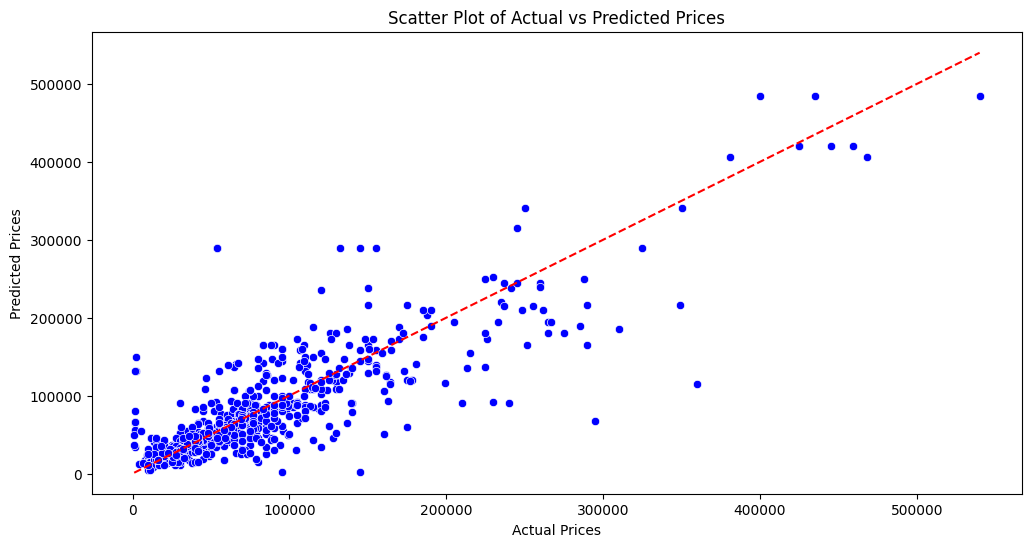

In [108]:
# buat grafik scater plot prediksi dengan line regresi
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=best_model_random_search.predict(X_test), color='blue', palette='Set2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Scatter Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

10. 2. XgBoost

In [109]:
# hyperparameter untuk param_distributions Xgboost
hyperparam_space_xgboost = {
    'algo__n_estimators': [100, 200, 300],  # benchmark: 100
    'algo__learning_rate': [0.01, 0.1, 0.2],  # benchmark: 0.01
    'algo__max_depth': [3, 5, 7],  # benchmark: 3
    'algo__subsample': [0.8, 0.9, 1.0],  # benchmark: 0.8
    'algo__colsample_bytree': [0.8, 0.9, 1.0],  # benchmark: 0.8
    'algo__reg_alpha': [0, 0.1, 1],  # benchmark: 0
    'algo__reg_lambda': [0, 0.1, 1]  # benchmark: 0
}
# model benchmark
xgboost_model = xgboost.XGBRegressor(objective='reg:squarederror', random_state=0)
# model dalam pipeline
xgboost_pipeline = Pipeline([
    ('transformer', transformer),
    ('scaler', scaler),
    ('algo', xgboost_model)
])
# RandomizedSearchCV untuk XGBoost
random_search_xgboost = RandomizedSearchCV(
    estimator= xgboost_pipeline,                # model
    param_distributions= hyperparam_space_xgboost,  # hyperparameter yg dituning
    cv= 5,                                      # jumlah fold untuk cross validation
    scoring= 'neg_mean_absolute_error',         # metric
    n_jobs= -1,                                 # pakai semua processor
    n_iter= 1000,                                 # jumlah kombinasi yang difitting
    random_state=0
)

# fit RandomizedSearchCV ke train set
random_search_xgboost.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Options',
                                                                                'Origin']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Make',
                                                                                'Region'])])),
                                             ('scaler', RobustScaler()),
                                             ('algo',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample...
                                                           num_parallel_tree=None, ...))]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'algo__colsample_bytree': [0.8, 0.9,
                                                                   1.0],
                                        'algo__learning_rate': [0.01, 0.1, 0.2],
                                        'algo__max_depth': [3, 5, 7],
                                        'algo__n_estimators': [100, 200, 300],
                                        'algo__reg_alpha': [0, 0.1, 1],
                                        'algo__reg_lambda': [0, 0.1, 1],
                                        'algo__subsample': [0.8, 0.9, 1.0]},
                   random_state=0, scoring='neg_mean_absolute_error')

In [110]:
#define best model
best_model_random_search_xgboost = random_search_xgboost.best_estimator_
# fitting
best_model_random_search_xgboost.fit(X_train, y_train)
# predict to test set
y_pred_random_search_xgboost = best_model_random_search_xgboost.predict(X_test)
# MAE
mean_absolute_error(y_test, y_pred_random_search_xgboost)
# MSE
mean_squared_error(y_test, y_pred_random_search_xgboost)
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred_random_search_xgboost))
print('RMSE Random Search XGBoost:', np.sqrt(mean_squared_error(y_test, y_pred_random_search_xgboost)))
print('MAE Random Search XGBoost:', mean_absolute_error(y_test, y_pred_random_search_xgboost))
print('MSE Random Search XGBoost:', mean_squared_error(y_test, y_pred_random_search_xgboost))

RMSE Random Search XGBoost: 27512.13375948874
MAE Random Search XGBoost: 16072.35546875
MSE Random Search XGBoost: 756917504.0


In [111]:
# tampilkan hasil RMSE,MAE, dan MSE dari model RandomizedSearchCV XGBoost diatas dalam bentuk tabel
pd.DataFrame({
    'Metrics->':['RMSE', 'MAE', 'MSE'],
    'Random Search XGBoost':[np.sqrt(mean_squared_error(y_test, y_pred_random_search_xgboost)),
                            mean_absolute_error(y_test, y_pred_random_search_xgboost),
                            mean_squared_error(y_test, y_pred_random_search_xgboost)]
})

,Metrics->,Random Search XGBoost
0,RMSE,2.751213e+04
1,MAE,1.607236e+04
2,MSE,7.569175e+08


/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/2762023398.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=best_model_random_search_xgboost.predict(X_test), color='blue', palette='Set2')


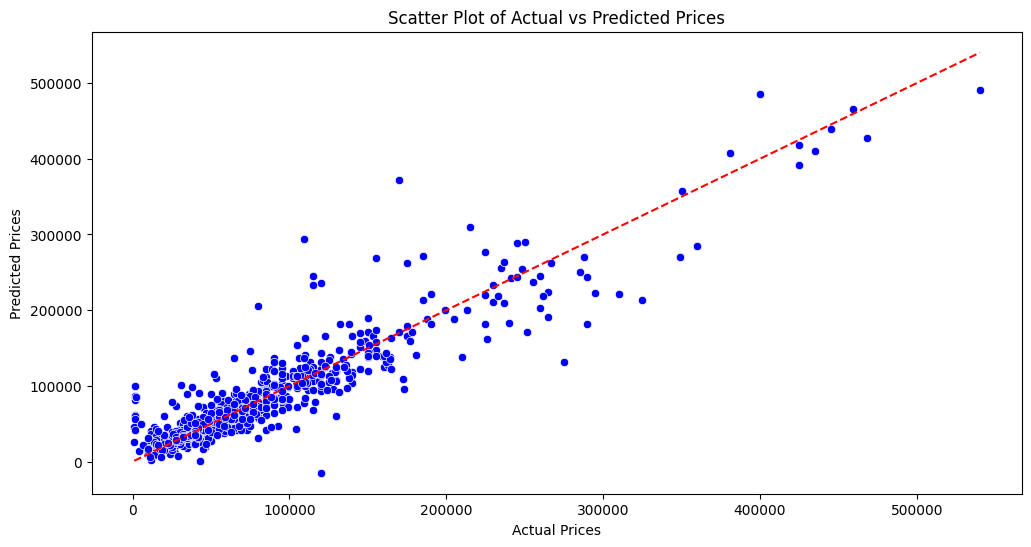

In [112]:
#buat grafik scater plot prediksi dengan line regresi
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=best_model_random_search_xgboost.predict(X_test), color='blue', palette='Set2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Scatter Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/516544817.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=best_model.predict(X_test), color='blue', palette='Set2', label='Decision Tree')
/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/516544817.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=best_model_xgboost.predict(X_test), color='green', palette='Set2', label='XGBoost')
/var/folders/m1/5wzz19gs5_b7ghgqkppdcg_c0000gn/T/ipykernel_1527/516544817.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=best_model_random_search_xgboost.predict(X_test), color='red', palette='Set2', label='RandomizedSearchCV XGBoost')


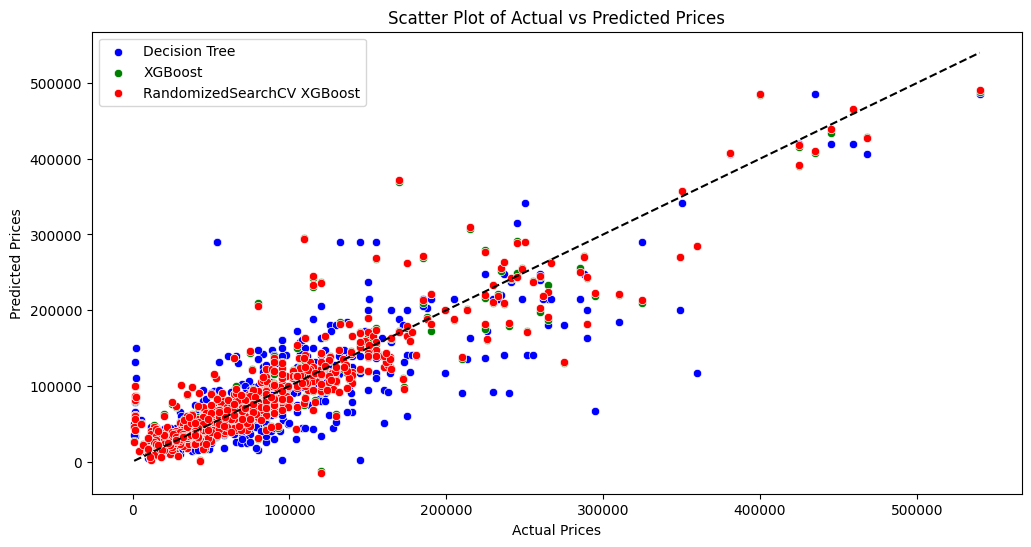

In [113]:
# perbandingan grafik scater plot prediksi dengan line regresi antara model Decision Tree, XGBoost, dan RandomizedSearchCV XGBoost
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=best_model.predict(X_test), color='blue', palette='Set2', label='Decision Tree')
sns.scatterplot(x=y_test, y=best_model_xgboost.predict(X_test), color='green', palette='Set2', label='XGBoost')
sns.scatterplot(x=y_test, y=best_model_random_search_xgboost.predict(X_test), color='red', palette='Set2', label='RandomizedSearchCV XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.title('Scatter Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

<b>penjelasan </b>

1. Grafik Scatter Plot di atas menunjukkan perbandingan antara model Decision Tree, XGBoost, dan RandomizedSearchCV XGBoost dalam memprediksi harga mobil bekas.
2. Setiap titik pada grafik mewakili harga aktual mobil bekas (sumbu x)
dan harga yang diprediksi oleh masing-masing model (sumbu y).
3. Garis hitam putus-putus menunjukkan garis referensi di mana harga aktual sama dengan harga yang diprediksi.
4. Semakin dekat titik-titik prediksi ke garis referensi,
semakin baik kinerja model dalam memprediksi harga mobil bekas.
5. Dari grafik, kita dapat melihat bahwa model RandomizedSearchCV XGBoost memiliki prediksi yang paling mendekati garis referensi,
diikuti oleh model XGBoost, dan terakhir model Decision Tree.

Dengan demikian, model RandomizedSearchCV XGBoost adalah model terbaik dalam hal akurasi prediksi harga mobil bekas pada dataset ini.

kesimpulann setelah menggunakan RandomizedSearchCV XGBoost, didapatkan nilai RMSE dan MAE yang lebih baik dibandingkan model XGBoost

sehingga model XGBoost setelah tuning lebih baik dibandingkan sebelum tuning.

## 11 Feature Importance ##

In [114]:
best_model_random_search_xgboost['transformer'].get_feature_names_out()

array(['one hot__Gear_Type_Manual', 'one hot__Options_Semi Full',
       'one hot__Options_Standard', 'one hot__Origin_Other',
       'one hot__Origin_Saudi', 'one hot__Origin_Unknown',
       'binary__Type_0', 'binary__Type_1', 'binary__Type_2',
       'binary__Type_3', 'binary__Type_4', 'binary__Type_5',
       'binary__Type_6', 'binary__Type_7', 'binary__Type_8',
       'binary__Make_0', 'binary__Make_1', 'binary__Make_2',
       'binary__Make_3', 'binary__Make_4', 'binary__Make_5',
       'binary__Region_0', 'binary__Region_1', 'binary__Region_2',
       'binary__Region_3', 'binary__Region_4', 'remainder__Year',
       'remainder__Engine_Size', 'remainder__Mileage'], dtype=object)

In [115]:

# Ambil importance dan nama fitur
importances = best_model_random_search_xgboost['algo'].feature_importances_
feature_names = best_model_random_search_xgboost['transformer'].get_feature_names_out()
# Buat DataFrame untuk menampilkan feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Urutkan berdasarkan importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Tampilkan 10 fitur terpenting
importance_df.head(20)

,Feature,Importance
15,binary__Make_0,0.191847
26,remainder__Year,0.082537
17,binary__Make_2,0.075027
27,remainder__Engine_Size,0.064803
14,binary__Type_8,0.059215
16,binary__Make_1,0.052445
19,binary__Make_4,0.047915
18,binary__Make_3,0.042370
6,binary__Type_0,0.039003
13,binary__Type_7,0.033820


In [116]:
# tampilkan data xgboost yang sudah di transformasi dalam bentuk DataFrame
pd.DataFrame(best_model_random_search_xgboost['transformer'].transform(X_train), columns=best_model_random_search_xgboost['transformer'].get_feature_names_out())


,one hot__Gear_Type_Manual,one hot__Options_Semi Full,one hot__Options_Standard,one hot__Origin_Other,one hot__Origin_Saudi,one hot__Origin_Unknown,binary__Type_0,binary__Type_1,binary__Type_2,binary__Type_3,...,binary__Make_4,binary__Make_5,binary__Region_0,binary__Region_1,binary__Region_2,binary__Region_3,binary__Region_4,remainder__Year,remainder__Engine_Size,remainder__Mileage
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2018.0,6.2,22200.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,3.8,170000.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2013.0,5.7,253.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2019.0,2.0,89500.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2013.0,5.3,77000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2021.0,2.5,3000.0
3054,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017.0,3.5,82000.0
3055,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2016.0,3.6,197000.0
3056,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2014.0,2.4,168000.0


In [117]:

binary_encoder = BinaryEncoder(cols=['Make'])
binary_encoder.fit(X_train[['Make']])

df_make_binary = pd.concat([X_train[['Make']], pd.DataFrame(binary_encoder.transform(X_train[['Make']]), columns=binary_encoder.get_feature_names_out())], axis=1)
df_make_binary


,Make,Make_0,Make_1,Make_2,Make_3,Make_4,Make_5
4075,Cadillac,0,0,0,0,0,1
3992,Genesis,0,0,0,0,1,0
564,Dodge,0,0,0,0,1,1
4485,Ford,0,0,0,1,0,0
682,GMC,0,0,0,1,0,1
...,...,...,...,...,...,...,...
1234,Lexus,0,1,0,0,1,0
4804,Ford,0,0,0,1,0,0
2420,Ford,0,0,0,1,0,0
3810,Lexus,0,1,0,0,1,0


In [118]:
# dari DataFrame df_make_binary, tampilkan yang Make_5 = 1
df_make_binary[df_make_binary['Make_5'] == 1]
# tampilkan nilai unik dari kolom 'Make' yang memiliki nilai 1 pada kolom 'Make_5'
unique_make = df_make_binary[df_make_binary['Make_5'] == 1]['Make'].unique()
print("Unique values in 'Make' where 'Make_5' is 1:", unique_make)  


Unique values in 'Make' where 'Make_5' is 1: ['Cadillac' 'Dodge' 'GMC' 'Land Rover' 'Toyota' 'Hyundai' 'Chrysler'
 'Jeep' 'Mercedes' 'Kia' 'Honda' 'FAW' 'Mitsubishi' 'Geely' 'Jaguar'
 'Volkswagen' 'Fiat' 'MINI' 'Other' 'Peugeot' 'HAVAL' 'Bentley'
 'Zhengzhou' 'Hummer' 'Great Wall' 'Classic']


In [119]:
# dari DataFrame df_make_binary, tampilkan yang Make_4 = 1 dan Make_5 = 0
df_make_binary[(df_make_binary['Make_4'] == 1) & (df_make_binary['Make_5'] == 0)]
# tampilkan nilai unik dari kolom 'Make' yang memiliki nilai 1 pada kolom 'Make_4' dan 0 pada kolom 'Make_5'
unique_make = df_make_binary[(df_make_binary['Make_4'] == 1) & (df_make_binary['Make_5'] == 0)]['Make'].unique()
print("Unique values in 'Make' where 'Make_4' is 1 and 'Make_5' is 0:", unique_make)

Unique values in 'Make' where 'Make_4' is 1 and 'Make_5' is 0: ['Genesis' 'BMW' 'Chevrolet' 'MG' 'Lexus' 'Mercury' 'INFINITI' 'Suzuki'
 'Maserati' 'Porsche' 'Foton' 'Rolls-Royce' 'Ferrari']


In [120]:
# dari DataFrame df_make_binary, tampilkan yang Make_3 = 1, Make_4 = 0, dan Make_5 = 0
df_make_binary[(df_make_binary['Make_3'] == 1) & (df_make_binary['Make_4'] == 0) & (df_make_binary['Make_5'] == 0)]
# tampilkan nilai unik dari kolom 'Make' yang memiliki nilai 1 pada kolom 'Make_3', 0 pada kolom 'Make_4', dan 0 pada kolom 'Make_5'
unique_make = df_make_binary[(df_make_binary['Make_3'] == 1) & (df_make_binary['Make_4'] == 0) & (df_make_binary['Make_5'] == 0)]['Make'].unique()
print("Unique values in 'Make' where 'Make_3' is 1, 'Make_4' is 0, and 'Make_5' is 0:", unique_make)

Unique values in 'Make' where 'Make_3' is 1, 'Make_4' is 0, and 'Make_5' is 0: ['Ford' 'Changan' 'Mazda' 'Renault' 'Lincoln' 'Aston Martin' 'Škoda']


In [121]:
binary_encoderType = BinaryEncoder(cols=['Type'])
binary_encoderType.fit(X_train[['Type']])

df_type_binary = pd.concat([X_train[['Type']], pd.DataFrame(binary_encoderType.transform(X_train[['Type']]), columns=binary_encoderType.get_feature_names_out())], axis=1)
df_type_binary

,Type,Type_0,Type_1,Type_2,Type_3,Type_4,Type_5,Type_6,Type_7,Type_8
4075,Escalade,0,0,0,0,0,0,0,0,1
3992,G80,0,0,0,0,0,0,0,1,0
564,Durango,0,0,0,0,0,0,0,1,1
4485,Taurus,0,0,0,0,0,0,1,0,0
682,Yukon,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1234,ES,0,0,0,1,0,0,0,1,0
4804,Edge,0,0,0,1,0,1,1,1,0
2420,Edge,0,0,0,1,0,1,1,1,0
3810,LX,0,0,0,0,1,1,1,0,1


In [122]:
# dari DataFrame df_make_type, tampilkan yang Type_8 = 1
df_type_binary[df_type_binary['Type_8'] == 1]
# tampilkan nilai unik dari kolom 'Type' yang memiliki nilai 1 pada kolom 'Type_8'
unique_type = df_type_binary[df_type_binary['Type_8'] == 1]['Type'].unique()
print("Unique values in 'Type' where 'Type_8' is 1:", unique_type)

Unique values in 'Type' where 'Type_8' is 1: ['Escalade' 'Durango' 'Yukon' 'Range Rover' 'Prado' 'Impala' 'Accent'
 'CS75' 'C300' 'Cherokee' 'GS3' 'GL' 'H1' 'Altima' 'LX' 'Marquis' 'C'
 'Echo Sport' 'Accord' 'Land Cruiser' 'Previa' 'E' 'Carnival' 'Tucson' 'S'
 'Rio' 'Optra' 'Yaris' 'Armada' 'Grand Marquis' 'Explorer' 'Trailblazer'
 'CS35 Plus' 'Cerato' 'Hiace' 'GX' 'Avalon' 'Optima' 'Terrain' 'The 7'
 'Juke' 'GLE' 'Malibu' 'Odyssey' 'Caprice' 'EC7' 'Emgrand' 'Duster' 'VTC'
 'Furniture' 'RX' 'RX5' 'City' 'Flex' '300' 'F150' 'Challenger' 'Seltos'
 'ASX' 'Other' 'The 6' 'The 4' 'Land Cruiser 70' 'Fusion' 'The 5'
 'Platinum' 'IS' 'Cressida' 'APV' 'Vego' 'K5' 'Spark' 'Outlander' 'CX9'
 'CT5' 'NX' 'Avante' 'Touareg' '3' 'SEL' 'Eado' 'Coaster' 'A5'
 'Quattroporte' 'CS85' 'Van' 'S300' 'CS95' 'Vitara' 'Navigator' 'CLA'
 'Ertiga' 'MKS' 'Azkarra' 'RX8' 'Countryman' 'CT4' 'Passat' 'A' 'Prestige'
 'Safrane' 'FX' 'H2' 'Aveo' 'X-Terra' 'Mini Van' 'Jimny' 'ATS' 'Safari'
 'Golf' 'DB9' 'CLS' 'Carens' 'D

In [123]:
# dari DataFrame df_make_type, tampilkan yang Type_3 = 1, da Type_4 sampai Type_8 = 0
df_type_binary[(df_type_binary['Type_3'] == 1) & (df_type_binary[['Type_4', 'Type_5', 'Type_6', 'Type_7', 'Type_8']] == 0).all(axis=1)]
# tampilkan nilai unik dari kolom 'Type' yang memiliki nilai 1 pada kolom 'Type_3'
unique_type = df_type_binary[(df_type_binary['Type_3'] == 1) & (df_type_binary[['Type_4', 'Type_5', 'Type_6', 'Type_7', 'Type_8']] == 0).all(axis=1)]['Type'].unique()
print("Unique values in 'Type' where 'Type_3' is 1 and 'Type_4' to 'Type_8' are 0:", unique_type)

Unique values in 'Type' where 'Type_3' is 1 and 'Type_4' to 'Type_8' are 0: ['Sportage' 'Ram' 'D-MAX' 'Macan' '911']


In [124]:
# lakukan mapping dari kolom biner ke kategori asli menggunakan informasi dari BinaryEncoder
# Ambil mapping dari BinaryEncoder
mapping= binary_encoder.mapping
mapping


[{'col': 'Make',
  'mapping':      Make_0  Make_1  Make_2  Make_3  Make_4  Make_5
   1        0       0       0       0       0       1
   2        0       0       0       0       1       0
   3        0       0       0       0       1       1
   4        0       0       0       1       0       0
   5        0       0       0       1       0       1
   6        0       0       0       1       1       0
   7        0       0       0       1       1       1
   8        0       0       1       0       0       0
   9        0       0       1       0       0       1
   10       0       0       1       0       1       0
   11       0       0       1       0       1       1
   12       0       0       1       1       0       0
   13       0       0       1       1       0       1
   14       0       0       1       1       1       0
   15       0       0       1       1       1       1
   16       0       1       0       0       0       0
   17       0       1       0       0       0       1


In [125]:
# best model
best_model_random_search_xgboost

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Options',
                                                   'Origin']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Type', 'Make',
                                                   'Region'])])),
                ('scaler', RobustScaler()),
                ('algo',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [126]:
import shap

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [127]:
# ambil feature importance dari model xgboost
my_model = best_model_random_search_xgboost[-1]
my_data = best_model_random_search_xgboost[0].transform(X_test)

# define explainer
explainer_shap = shap.TreeExplainer(
    model= my_model,
    data= my_data,
    # feature_dependence= 'independent',
    # model_output= 'probability'
)

# hitung shap value untuk tiap baris di data train
shap_values = explainer_shap.shap_values(my_data)

 98%|===================| 749/765 [00:11<00:00]       

In [128]:
my_data

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.01600e+03,
        1.60000e+00, 1.38661e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.01600e+03,
        3.50000e+00, 1.90000e+05],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 2.01700e+03,
        2.50000e+00, 1.81000e+05],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.01700e+03,
        2.40000e+00, 2.00000e+04],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 2.01600e+03,
        1.60000e+00, 1.62000e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.02000e+03,
        2.50000e+00, 4.40000e+04]], shape=(765, 29))

In [129]:
shap_values

array([[   963.10285182, -18038.82118595,  11973.30135442, ...,
             0.        ,   1789.39983266,      0.        ],
       [  1383.89227737,   7402.30117339,  15872.45943062, ...,
             0.        ,  -2269.30327969,      0.        ],
       [   488.17658417,   2371.41619863, -37090.23630778, ...,
             0.        ,    796.12065285,      0.        ],
       ...,
       [   754.1981982 , -11041.99965517,  12786.32877218, ...,
             0.        ,    650.61949237,      0.        ],
       [ -9046.04161325,   4658.47360784, -30992.28941449, ...,
             0.        ,   8104.96059517,      0.        ],
       [   754.1981982 , -11041.99965517,  12786.32877218, ...,
             0.        ,    650.61949237,      0.        ]],
      shape=(765, 29))

In [130]:
best_model_random_search_xgboost['transformer'].transformers_[0][1].get_feature_names_out()

array(['Gear_Type_Manual', 'Options_Semi Full', 'Options_Standard',
       'Origin_Other', 'Origin_Saudi', 'Origin_Unknown'], dtype=object)

In [131]:
best_model_random_search_xgboost['transformer'].transformers_[1][1].get_feature_names_out()

array(['Type_0', 'Type_1', 'Type_2', 'Type_3', 'Type_4', 'Type_5',
       'Type_6', 'Type_7', 'Type_8', 'Make_0', 'Make_1', 'Make_2',
       'Make_3', 'Make_4', 'Make_5', 'Region_0', 'Region_1', 'Region_2',
       'Region_3', 'Region_4'], dtype=object)

In [132]:
best_model_random_search_xgboost['transformer'].transformers_[2][1].get_feature_names_out()

array(['Year', 'Engine_Size', 'Mileage'], dtype=object)

In [133]:
# ambil nama fitur
feat_one_hot = best_model_random_search_xgboost['transformer'].transformers_[0][1].get_feature_names_out()
feat_binary = best_model_random_search_xgboost['transformer'].transformers_[1][1].get_feature_names_out()
feat_robust = best_model_random_search_xgboost['transformer'].transformers_[2][1].get_feature_names_out()
feat_ohe_binary = np.concatenate([feat_one_hot, feat_binary, feat_robust])
feat_ohe_binary # buat DataFrame untuk menampilkan feature importance


array(['Gear_Type_Manual', 'Options_Semi Full', 'Options_Standard',
       'Origin_Other', 'Origin_Saudi', 'Origin_Unknown', 'Type_0',
       'Type_1', 'Type_2', 'Type_3', 'Type_4', 'Type_5', 'Type_6',
       'Type_7', 'Type_8', 'Make_0', 'Make_1', 'Make_2', 'Make_3',
       'Make_4', 'Make_5', 'Region_0', 'Region_1', 'Region_2', 'Region_3',
       'Region_4', 'Year', 'Engine_Size', 'Mileage'], dtype=object)

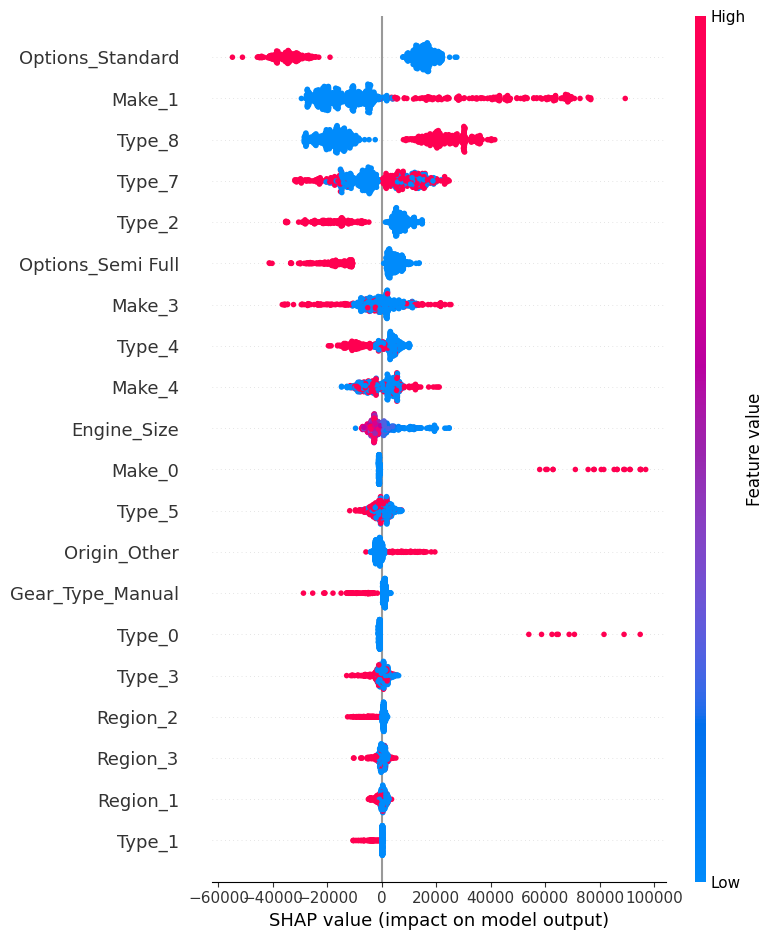

In [134]:
# tampilkan shap
shap.summary_plot(shap_values, my_data, feature_names=feat_ohe_binary)


<b>Kesimpulan</b>

1. Feature Option Standard, Mobil bekas yang dijual dengan opsi aksesoris standard akan menurunka prediksi harga, kemungkinan karena dianggap kurang menarik dan terasosiasi dengan mobil kelas bawah atau model lama. Sedangkan opsi lainnya seperti Full dan Semi Full menaikkan prediksi harga.
2. Brand dari kategori Make 1 akan menaikkan harga jual, sedangkan brand diluar kategori Make 1 harga mobil diprediksi cenderung turun.
3. Feature Engine Size, jika mesin mobil semakin kecil maka harga mobil bekas semakin murah, begitu juga dengan sebaliknya jika mesin mobilnya semakin besar akan mempengaruhi harga jual yang cenderung semakin mahal.
4. Feature Gear Type, jika Manual maka harga mobil bekas semakin murah atau harga jualnya cenderung turun, sedangkan Otomatis maka harga mobil semakin mahal atau harga jualnya cenderung naik.
5. Feature Year atau Tahun Produksi, semakin baru tahun produksinya harga mobil lebih mahal, sedangkan semakin lama tahun produksinnya harga mobil lebih murah.
6. Feature Mileage atau Jarak Tempuh, mobil yang memiliki jarak tempuh semakin banyak harga mobilnya semakin murah, sebaliknnya mobil dengan jarak tempuh lebih sedikit harga mobil semakin mahal atau cenderung naik.

### SHAP untuk 1 data point (1 baris)

In [135]:
X_test.iloc[[0]]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage
877,Corolla,Riyadh,Toyota,Automatic,Saudi,Semi Full,2016,1.6,138661


In [136]:
y_test.iloc[[0]]

877    47500
Name: Price, dtype: int64

In [137]:
# Start js (must have)
shap.initjs()

In [138]:
def shap_plot(index, model, dataframe):

    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(dataframe)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[index], dataframe.iloc[[index]])

    return(p)

In [139]:
X_test_prep = pd.DataFrame(best_model_random_search_xgboost[0].transform(X_test), columns=feat_ohe_binary)

In [140]:
X_test_prep

,Gear_Type_Manual,Options_Semi Full,Options_Standard,Origin_Other,Origin_Saudi,Origin_Unknown,Type_0,Type_1,Type_2,Type_3,...,Make_4,Make_5,Region_0,Region_1,Region_2,Region_3,Region_4,Year,Engine_Size,Mileage
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2016.0,1.6,138661.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2016.0,3.5,190000.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2017.0,2.5,181000.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1994.0,5.3,90531.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2019.0,1.5,112000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2018.0,2.4,40000.0
761,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2013.0,3.0,74924.0
762,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2017.0,2.4,20000.0
763,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2016.0,1.6,162000.0


In [141]:
# compare shap_plot(0, my_model, X_test_prep)
shap_plot(0, my_model, X_test_prep) 

In [142]:
# predict harga mobil dari index ke-0
predicted_price = my_model.predict(X_test_prep.iloc[[0]])
print(f"Predicted price for the car at index 0: {predicted_price[0]}")

Predicted price for the car at index 0: 127057.0703125


## Save Final Model ##

In [143]:
# save final model
import joblib
import pickle

In [144]:
# best model
xgboost_model_final = best_model_random_search_xgboost
xgboost_model_final

# fit final model
xgboost_model_final.fit(X_train, y_train)
# save model with pickle
pickle.dump(xgboost_model_final, open('xgboost_model_final.sav', 'wb'))

In [145]:
# load model with pickle
loaded_model = pickle.load(open('xgboost_model_final.sav', 'rb'))
loaded_model

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Options',
                                                   'Origin']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Type', 'Make',
                                                   'Region'])])),
                ('scaler', RobustScaler()),
                ('algo',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [146]:
# predict with loaded model
y_pred_loaded = loaded_model.predict(X_test)
# Metric evaluation with loaded model
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
rmse_loaded = np.sqrt(mse_loaded)
mae_loaded = mean_absolute_error(y_test, y_pred_loaded)
print('MSE Loaded Model:', mse_loaded)
print('RMSE Loaded Model:', rmse_loaded)
print('MAE Loaded Model:', mae_loaded)

MSE Loaded Model: 756917504.0
RMSE Loaded Model: 27512.13375948874
MAE Loaded Model: 16072.35546875


### Kesimpulan ###

Contoh prediksi harga :

1. Model XGBoost digunakan untuk memprediksi harga mobil bekas dengan hasil prediksi sebesar 127.057 Riyal. 
2. Nilai evaluasi model: MSE 756.917.504; RMSE 27.512,1; dan MAE 16.072,3. 
3. Kesimpulannya, model ini mampu memprediksi harga dengan rata-rata kesalahan prediksi 16.000–27.000 Riyal
4. Artinya, jika harga mobil sebenarnya adalah 120.000 Riyal, model bisa memprediksi di kisaran 100.000 hingga 154.000 Riyal. Ini cukup akurat untuk membantu pengambilan keputusan di pasar mobil bekas



